In [1]:
# importing packages and modules
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
# import jax

# code from summer project working with PWM data
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '..', 'LC_PWM_GLM-HMM/code')))
import io_utils, analysis_utils, plotting_utils

sns.set_context("talk")

In [2]:
# list of animals that have good psychometrics
animalsIDs = ['W060','W068','W073','W074','W075','W080','W081','W082','W088','W089']
animalsCurrent = ['W068','W075','W068','W081','W089']

In [3]:
pni_path = '/Users/lencacuturela/Desktop/github/LC_PWM_GLM-HMM/data'
laptop_path = '/Users/lencacuturela/Desktop/Research/github/LC_PWM_GLM-HMM/data'

In [4]:
path = laptop_path
x, y = io_utils.prepare_design_matrices(rat_id='W081', path=path, psychometric=True, cutoff=40, stage_filter=3, overwrite=False)
sessInd = list(io_utils.session_start(rat_id='W081', path=path, psychometric=True, cutoff=40, stage_filter=3))
N = x.shape[0]
C = 2 # classes
K = 1 # states
D = x.shape[1]
print(N)

# Fitting a dGLM-HMM1 as check up

# dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
# initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
# checkP, checkW, checkLl = dGLM_HMM.fit(x, y,  initP, initW, sigma=reshapeSigma(10**4, K, D), sessInd=sessInd, pi0=None, maxIter=400, tol=1e-4) # fit the model
# print(np.argmax(checkLl))

104019


In [18]:
rat_id = 'W081'
path = laptop_path
stage_filter=3
folds=4
x, y = io_utils.prepare_design_matrices(rat_id=rat_id, path=path, psychometric=True, cutoff=40, stage_filter=stage_filter, overwrite=False)
sessInd = list(io_utils.session_start(rat_id=rat_id, path=path, psychometric=True, cutoff=40, stage_filter=stage_filter)) 
trainX, trainY, trainSessInd, testX, testY, testSessInd = split_data(x, y, sessInd, folds=folds, blocks=10, random_state=1)
D = trainX[0].shape[1]
C = 2 # only looking at binomial classes

fold = 0
N = trainX[fold].shape[0]
oneSessInd = [0,N] # treating whole dataset as one session for normal GLM-HMM fitting
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
trainY[fold] = trainY[fold].astype(int)
testY[fold] = testY[fold].astype(int)

# Fitting single dGLM-HMM1 for folds

# initP, initW = dGLM_HMM.generate_param(sessInd=trainSessInd[fold], transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
# allP,  allW, trainLl = dGLM_HMM.fit(trainX[fold], trainY[fold],  initP, initW, sigma=reshapeSigma(10**5, K, D), sessInd=trainSessInd[fold], pi0=None, maxIter=400, tol=1e-3, penaltyW=True) # fit the model

### Finding best global GLM-HMM for each animal indiviually (Iris' code as it's faster) and fitting from there

In [8]:
animalsCurrent = ['W060','W075','W081']
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,4,1,dtype=float))] 
nfolds = 4

for animal in animalsCurrent:
    K = 2
    x, y = io_utils.prepare_design_matrices(rat_id=animal, path=pni_path, psychometric=True, cutoff=10, stage_filter=3, overwrite=False)
    sessInd = list(io_utils.session_start(rat_id=animal, path=pni_path, psychometric=True, cutoff=10, stage_filter=3))
    glmhmmW = np.load(f'../data_PWM/W_PWM_bestGLMHMM-Iris_{animal}_sf=3_{K}_state.npy')
    glmhmmP = np.load(f'../data_PWM/P_PWM_bestGLMHMM-Iris_{animal}_sf=3_{K}_state.npy')
    print("Animal ", animal)
    trainLl, testLl, allP, allW = fit_eval_CV_multiple_sigmas_PWM(rat_id=animal, stage_filter=3, K=K, folds=nfolds, sigmaList = sigmaList, maxiter=300, glmhmmW=glmhmmW, glmhmmP=glmhmmP, L2penaltyW=1, path=pni_path, save=True)


Animal  W075
Sigma Index 0
GLM HMM BEST INIT
0


[[[[ 0.         -0.03995084]
   [ 0.         -1.2224458 ]
   [ 0.          1.67129189]
   [ 0.         -0.23273413]
   [ 0.         -0.17079253]
   [ 0.         -0.32119218]]

  [[ 0.          0.04025063]
   [ 0.         -0.30774395]
   [ 0.          0.818934  ]
   [ 0.         -0.14915913]
   [ 0.         -0.50921711]
   [ 0.         -0.73993549]]]


 [[[ 0.         -0.03995084]
   [ 0.         -1.2224458 ]
   [ 0.          1.67129189]
   [ 0.         -0.23273413]
   [ 0.         -0.17079253]
   [ 0.         -0.32119218]]

  [[ 0.          0.04025063]
   [ 0.         -0.30774395]
   [ 0.          0.818934  ]
   [ 0.         -0.14915913]
   [ 0.         -0.50921711]
   [ 0.         -0.73993549]]]


 [[[ 0.         -0.03995084]
   [ 0.         -1.2224458 ]
   [ 0.          1.67129189]
   [ 0.         -0.23273413]
   [ 0.         -0.17079253]
   [ 0.         -0.32119218]]

  [[ 0.          0.04025063]
   [ 0.         -0.30774395]
   [ 0.          0.818934  ]
   [ 0.         -0.14915913]


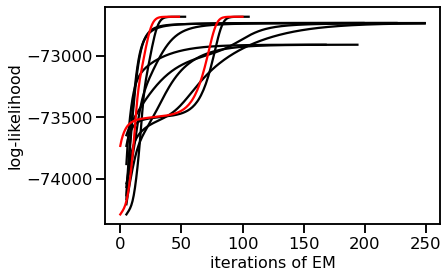

In [29]:
rat_id = 'W075'
K=2
L2penaltyW=1
allLl = np.load(f'../data_PWM/trainLl-global_PWM_{rat_id}_sf=3_{K}_state_multiple_inits_L2penaltyW={L2penaltyW}.npy')
allP = np.load(f'../data_PWM/P-global_PWM_{rat_id}_sf=3_{K}_state_multiple_inits_L2penaltyW={L2penaltyW}.npy')
allW = np.load(f'../data_PWM/W-global_PWM_{rat_id}_sf=3_{K}_state_multiple_inits_L2penaltyW={L2penaltyW}.npy')
fig, axes = plt.subplots(1)
bestInd, finalLl, topInd = find_top_init_plot_loglikelihoods(allLl[0:9],maxdiff=0.2,ax=axes,startix=5,plot=True)
print(allW[bestInd])
print(allP[bestInd])

### Global Optimal solutions found from standard GLM-HMM fitting (in PWM_GLM-HMM) with 4 animals put together and multiple initializations
(checked that top solutions are consistent in parameters and they are the same ones found with Iris' code)
### and used now for initialization model with sigma=0.1

[0 2 3]


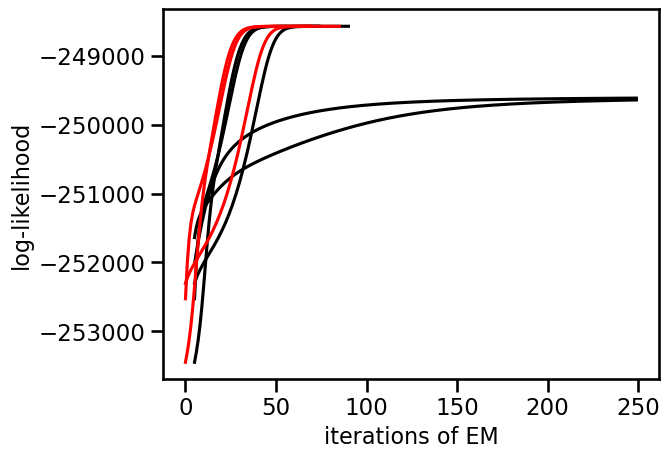

In [5]:
# Loading 
tempLl = np.load('../data_PWM/trainLl-global_PWM_all-animals_sf=4_2_state_multiple_inits_L2penaltyW=1.npy')
tempP = np.load('../data_PWM/P-global_PWM_all-animals_sf=4_2_state_multiple_inits_L2penaltyW=1.npy')
tempW = np.load('../data_PWM/W-global_PWM_all-animals_sf=4_2_state_multiple_inits_L2penaltyW=1.npy')
fig, axes = plt.subplots(1)
bestInd, finalLl, topInd = find_top_init_plot_loglikelihoods(tempLl[0:5],maxdiff=100,ax=axes,startix=5,plot=True)
print(topInd)

In [11]:
oldP = np.load('../data_PWM/P_PWM_W075_sf=3_2_state_fold-0_multiple_sigmas_penaltyW=True.npy')
oldW = np.load('../data_PWM/W_PWM_W075_sf=3_2_state_fold-0_multiple_sigmas_penaltyW=True.npy')
oldLl = np.load('../data_PWM/W_PWM_W075_sf=3_2_state_fold-0_multiple_sigmas_penaltyW=True.npy')
print(oldP)
oldTrainLl = 0
oldTestLl = 0
sess = len(testSessInd[fold]) - 1 # number sessions
testPhi = dGLM_HMM.observation_probability(testX[fold], reshapeWeights(oldW[0], oldSessInd, testSessInd[fold], True))
for s in range(0, sess):
    # evaluate on test data for each session separately
    _, _, temp = dGLM_HMM.forward_pass(testY[fold][testSessInd[fold][s]:testSessInd[fold][s+1]],oldP[0],testPhi[testSessInd[fold][s]:testSessInd[fold][s+1]])
    testLlInit[ind] += temp

testLlInit = testLlInit / testSessInd[fold][-1] # normalizing to the total number of trials in test dataset

(13, 2, 2)


In [ ]:
# Checking that parameters are consistent across top matching indices

# oneSessInd = np.arange(0, tempW[0].shape[0],300)
# for ind in topInd:
#     print(tempP[ind])
#     fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(26,11))
#     fig.suptitle(f'Weights for 4 animals with {K} states & sigma=0')
#     fig.tight_layout()
#     axes[0,0].set_ylim(-2.2,2.2)
#     axes[1,0].set_ylim(-2.2,2.2)
#     axes[0,1].set_ylim(-2.2,2.2)
#     axes[1,1].set_ylim(-2.2,2.2)
#     plotting_weights_PWM(w=tempW[ind], sessInd=oneSessInd, axes=axes, sessStop=None, title=f'Weights for 4 animals with {K} states & sigma=0', save_fig=False)


[[[[ 0.         -0.03995084]
   [ 0.         -1.2224458 ]
   [ 0.          1.67129189]
   [ 0.         -0.23273413]
   [ 0.         -0.17079253]
   [ 0.         -0.32119218]]

  [[ 0.          0.04025063]
   [ 0.         -0.30774395]
   [ 0.          0.818934  ]
   [ 0.         -0.14915913]
   [ 0.         -0.50921711]
   [ 0.         -0.73993549]]]


 [[[ 0.         -0.03995084]
   [ 0.         -1.2224458 ]
   [ 0.          1.67129189]
   [ 0.         -0.23273413]
   [ 0.         -0.17079253]
   [ 0.         -0.32119218]]

  [[ 0.          0.04025063]
   [ 0.         -0.30774395]
   [ 0.          0.818934  ]
   [ 0.         -0.14915913]
   [ 0.         -0.50921711]
   [ 0.         -0.73993549]]]


 [[[ 0.         -0.03995084]
   [ 0.         -1.2224458 ]
   [ 0.          1.67129189]
   [ 0.         -0.23273413]
   [ 0.         -0.17079253]
   [ 0.         -0.32119218]]

  [[ 0.          0.04025063]
   [ 0.         -0.30774395]
   [ 0.          0.818934  ]
   [ 0.         -0.14915913]


KeyboardInterrupt: 

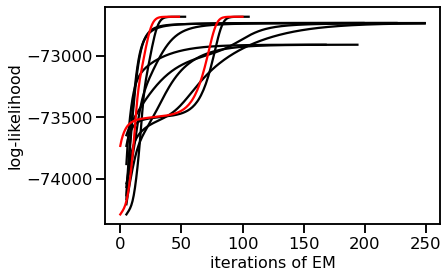

In [36]:
# FITTING BY INITIALIAZING WITH GLOBAL FIT ACROSS ANIMALS

sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
nfolds = 4

# best found initialization with my code - starting from global fit across animals 
rat_id = 'W075'
K=2
L2penaltyW=1
allLl = np.load(f'../data_PWM/trainLl-global_PWM_{rat_id}_sf=3_{K}_state_multiple_inits_L2penaltyW={L2penaltyW}.npy')
allP = np.load(f'../data_PWM/P-global_PWM_{rat_id}_sf=3_{K}_state_multiple_inits_L2penaltyW={L2penaltyW}.npy')
allW = np.load(f'../data_PWM/W-global_PWM_{rat_id}_sf=3_{K}_state_multiple_inits_L2penaltyW={L2penaltyW}.npy')
fig, axes = plt.subplots(1)
bestInd, finalLl, topInd = find_top_init_plot_loglikelihoods(allLl[0:9],maxdiff=0.2,ax=axes,startix=5,plot=True)
print(allW[bestInd])
print(allP[bestInd])

# for randInd in randomOrder:
#     animal = animalsIDs[randInd]
for animal in ['W075']:
    # K = 2
    # print("Animal ", animal)
    # trainLl, testLl, allP, allW = fit_eval_CV_multiple_sigmas_PWM(rat_id=rat_id, stage_filter=3, K=K, folds=nfolds, sigmaList = sigmaList, maxiter=300, glmhmmW=allW[bestInd], glmhmmP=allP[bestInd], L2penaltyW=1, path=laptop_path, save=True)

    K = 1
    print("Animal ", animal)
    trainLl, testLl, allP, allW = fit_eval_CV_multiple_sigmas_PWM(rat_id=rat_id, stage_filter=3, K=K, folds=nfolds, sigmaList = sigmaList, maxiter=300, glmhmmW=None, glmhmmP=None, L2penaltyW=1, path=laptop_path, save=True)


### Fitting dGLM-HMM1 for PWM data with K=1,2 and multiple sigmas value

In [48]:
randomOrder = np.array([6, 1, 9, 4, 5, 0, 7, 8, 3, 2])
print(randomOrder) # [6 1 9 4 5 0 7 8 3 2]

[6 1 9 4 5 0 7 8 3 2]


In [ ]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,4,1,dtype=float))] 
nfolds = 4

# for randInd in randomOrder:
#     animal = animalsIDs[randInd]
for K in [2,1]:
    for animal in ['W060','W075','W068','W081']:
        print("Animal ", animal)
        glmhmmP = np.load(f'../data_PWM/P-global_PWM_all-animals_sf=4_{K}_state_multiple_inits_L2penaltyW=1.npy')
        glmhmmW = np.load(f'../data_PWM/W-global_PWM_all-animals_sf=4_{K}_state_multiple_inits_L2penaltyW=1.npy')
        print(glmhmmW.shape)
        # trainLl, testLl, allP, allW = fit_eval_CV_multiple_sigmas_PWM(rat_id=animal, stage_filter=3, K=K, folds=nfolds, sigmaList = sigmaList, maxiter=300, glmhmmW=glmhmmW, glmhmmP=glmhmmP, L2penaltyW=1, path=pni_path, save=True)

# new version of obs prob takes ... to fit 

Animal  W075
(12, 489249, 2, 6, 2)
Animal  W081
(12, 489249, 2, 6, 2)
Animal  W060
(12, 489249, 2, 6, 2)
Animal  W075
(20, 489249, 1, 6, 2)
Animal  W081
(20, 489249, 1, 6, 2)
Animal  W060
(20, 489249, 1, 6, 2)


In [24]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
nfolds = 4
trainLl, testLl, allP, allW = fit_eval_CV_multiple_sigmas_PWM(rat_id='W089', stage_filter=3, K=3, folds=nfolds, sigmaList = sigmaList, maxiter=300, penaltyW=True, path=laptop_path, save=True)


Sigma Index 0
0
100
200
Sigma Index 1
0
100
200
Sigma Index 2
0
100


KeyboardInterrupt: 

/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/plotting_utils.py:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color=colormap[color+fold], linestyle=linestyle, label=labels[fold])
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/plotting_utils.py:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color=colormap[color+fold], linestyle=linestyle, label=labels[fold])
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/plotting_utils.py:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will

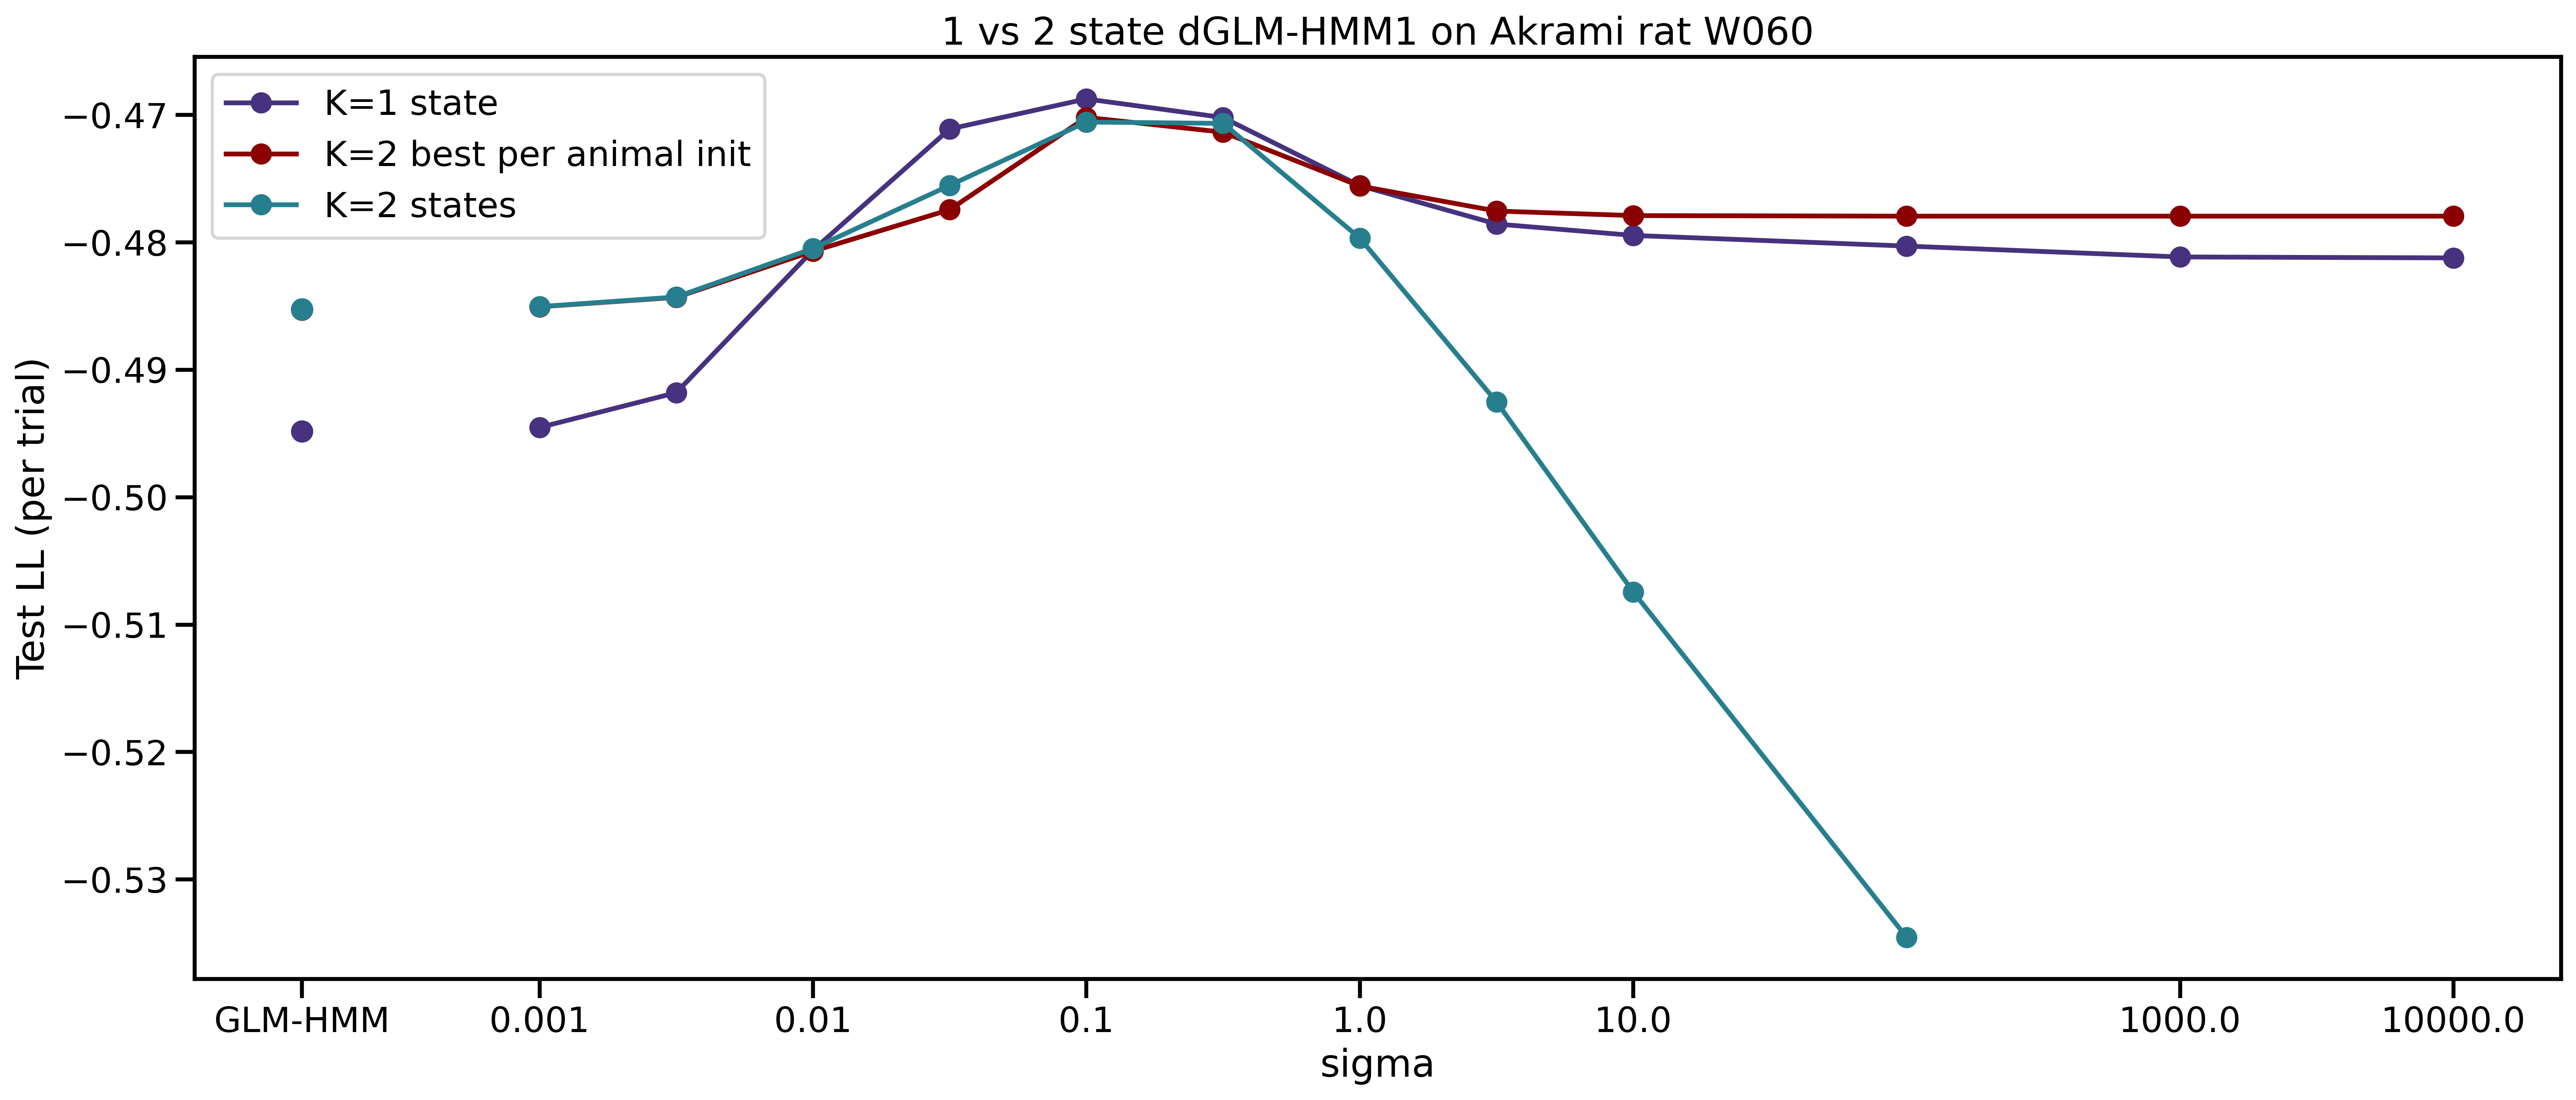

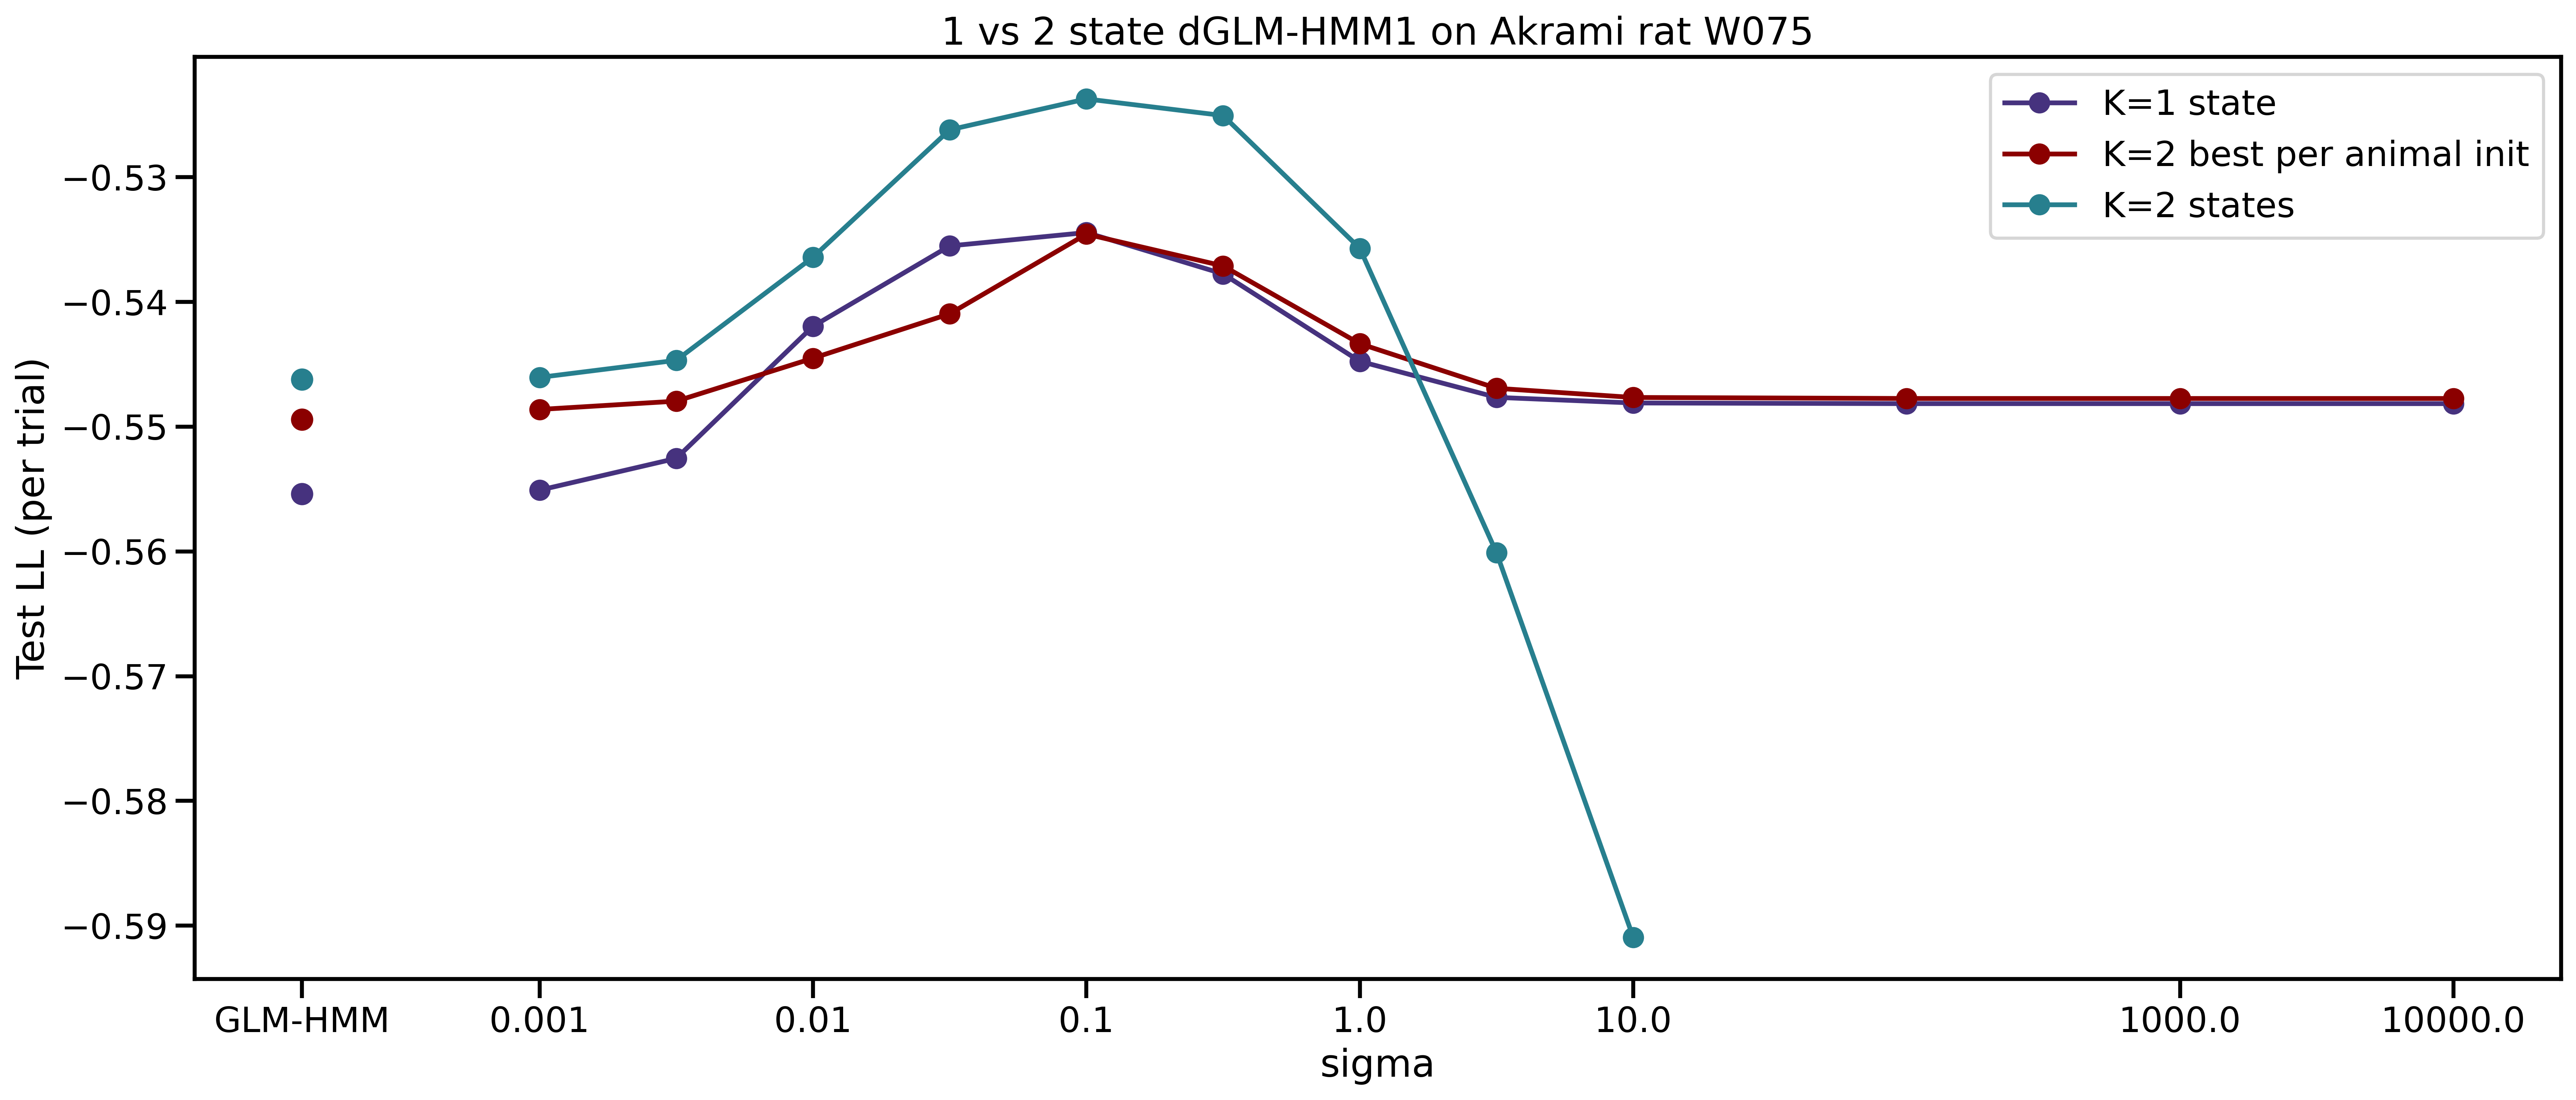

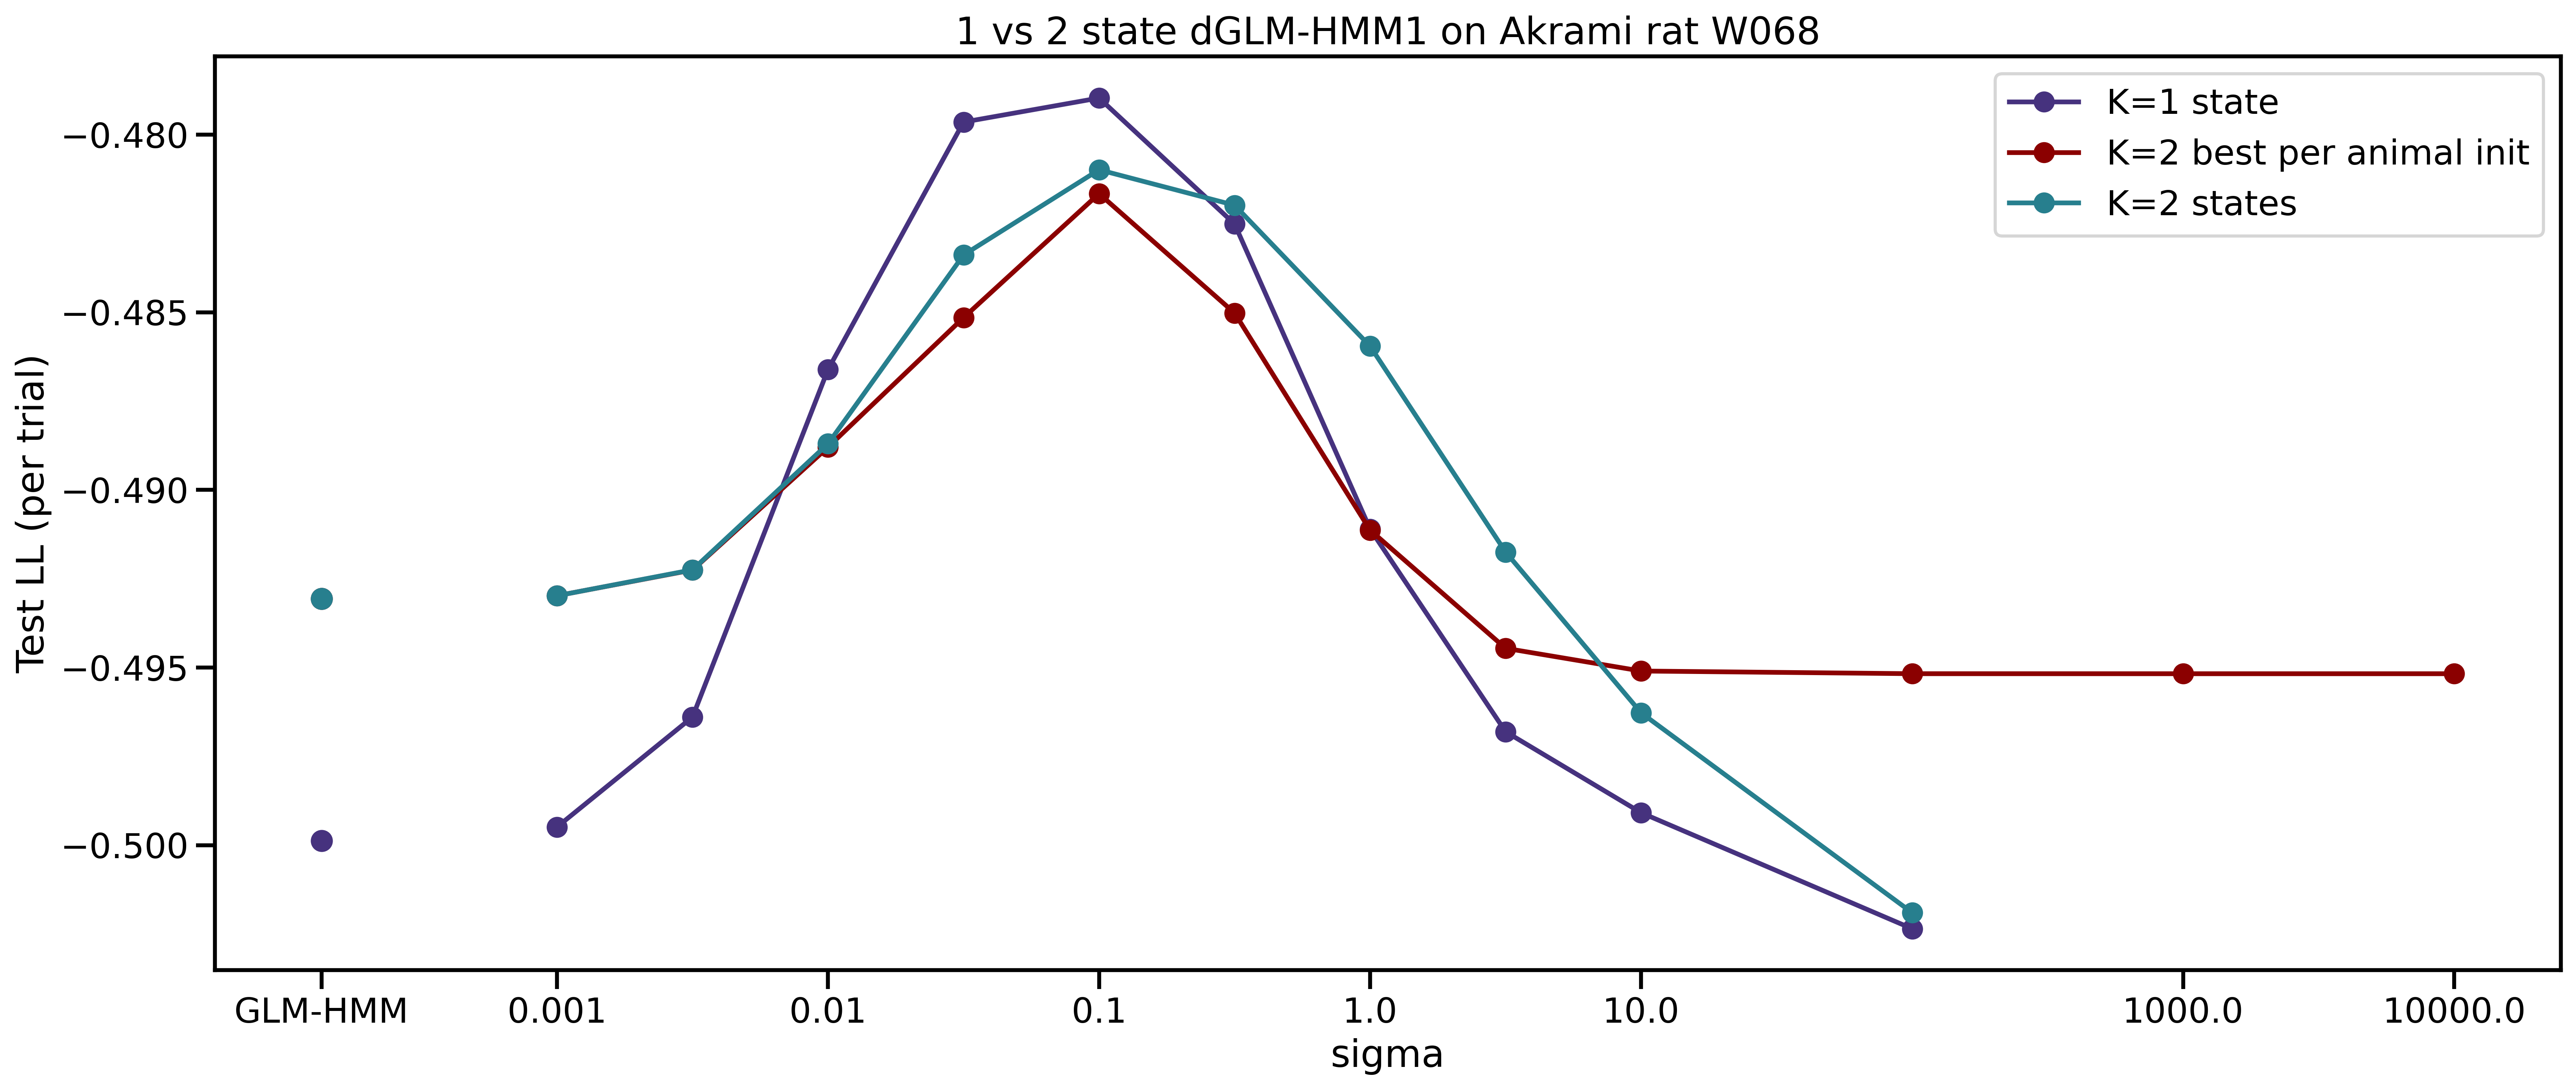

In [6]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# 1 vs 2 state test LL vs sigma for all animals
for animal in ['W060','W075','W068']:#['W075','W081','W068','W060','W089']:#animalsCurrent:
    fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
    sigma_CV_testLl_plot_PWM(rat_id=animal, stage_filter=3, K=1, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 state dGLM-HMM1 on Akrami rat {animal}', labels=['K=1 state'], color=0, penaltyW=True, save_fig=False)
    testLl = np.load(f'../data_PWM/testLl_PWM_{animal}_sf=3_2_state_fold-0_multiple_sigmas_L2penaltyW=1.npy')
    axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color='darkred', label='K=2 best per animal init')
    axes.scatter(-2 + np.log(sigmaList[1]), testLl[0], color='darkred')
    # testLl = np.load(f'../data_PWM/testLl_PWM_{animal}_sf=3_2_state_fold-0_multiple_sigmas_L2penaltyW=1.npy')
    # axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color='red', label='K=2 best Lenca init')
    # axes.scatter(-2 + np.log(sigmaList[1]), testLl[0], color='red')
    sigma_CV_testLl_plot_PWM(rat_id=animal, stage_filter=3, K=2, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 state dGLM-HMM1 on Akrami rat {animal}', labels=['K=2 states'], color=2, penaltyW=True, save_fig=False)

/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/plotting_utils.py:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color=colormap[color+fold], linestyle=linestyle, label=labels[fold])
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/plotting_utils.py:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color=colormap[color+fold], linestyle=linestyle, label=labels[fold])


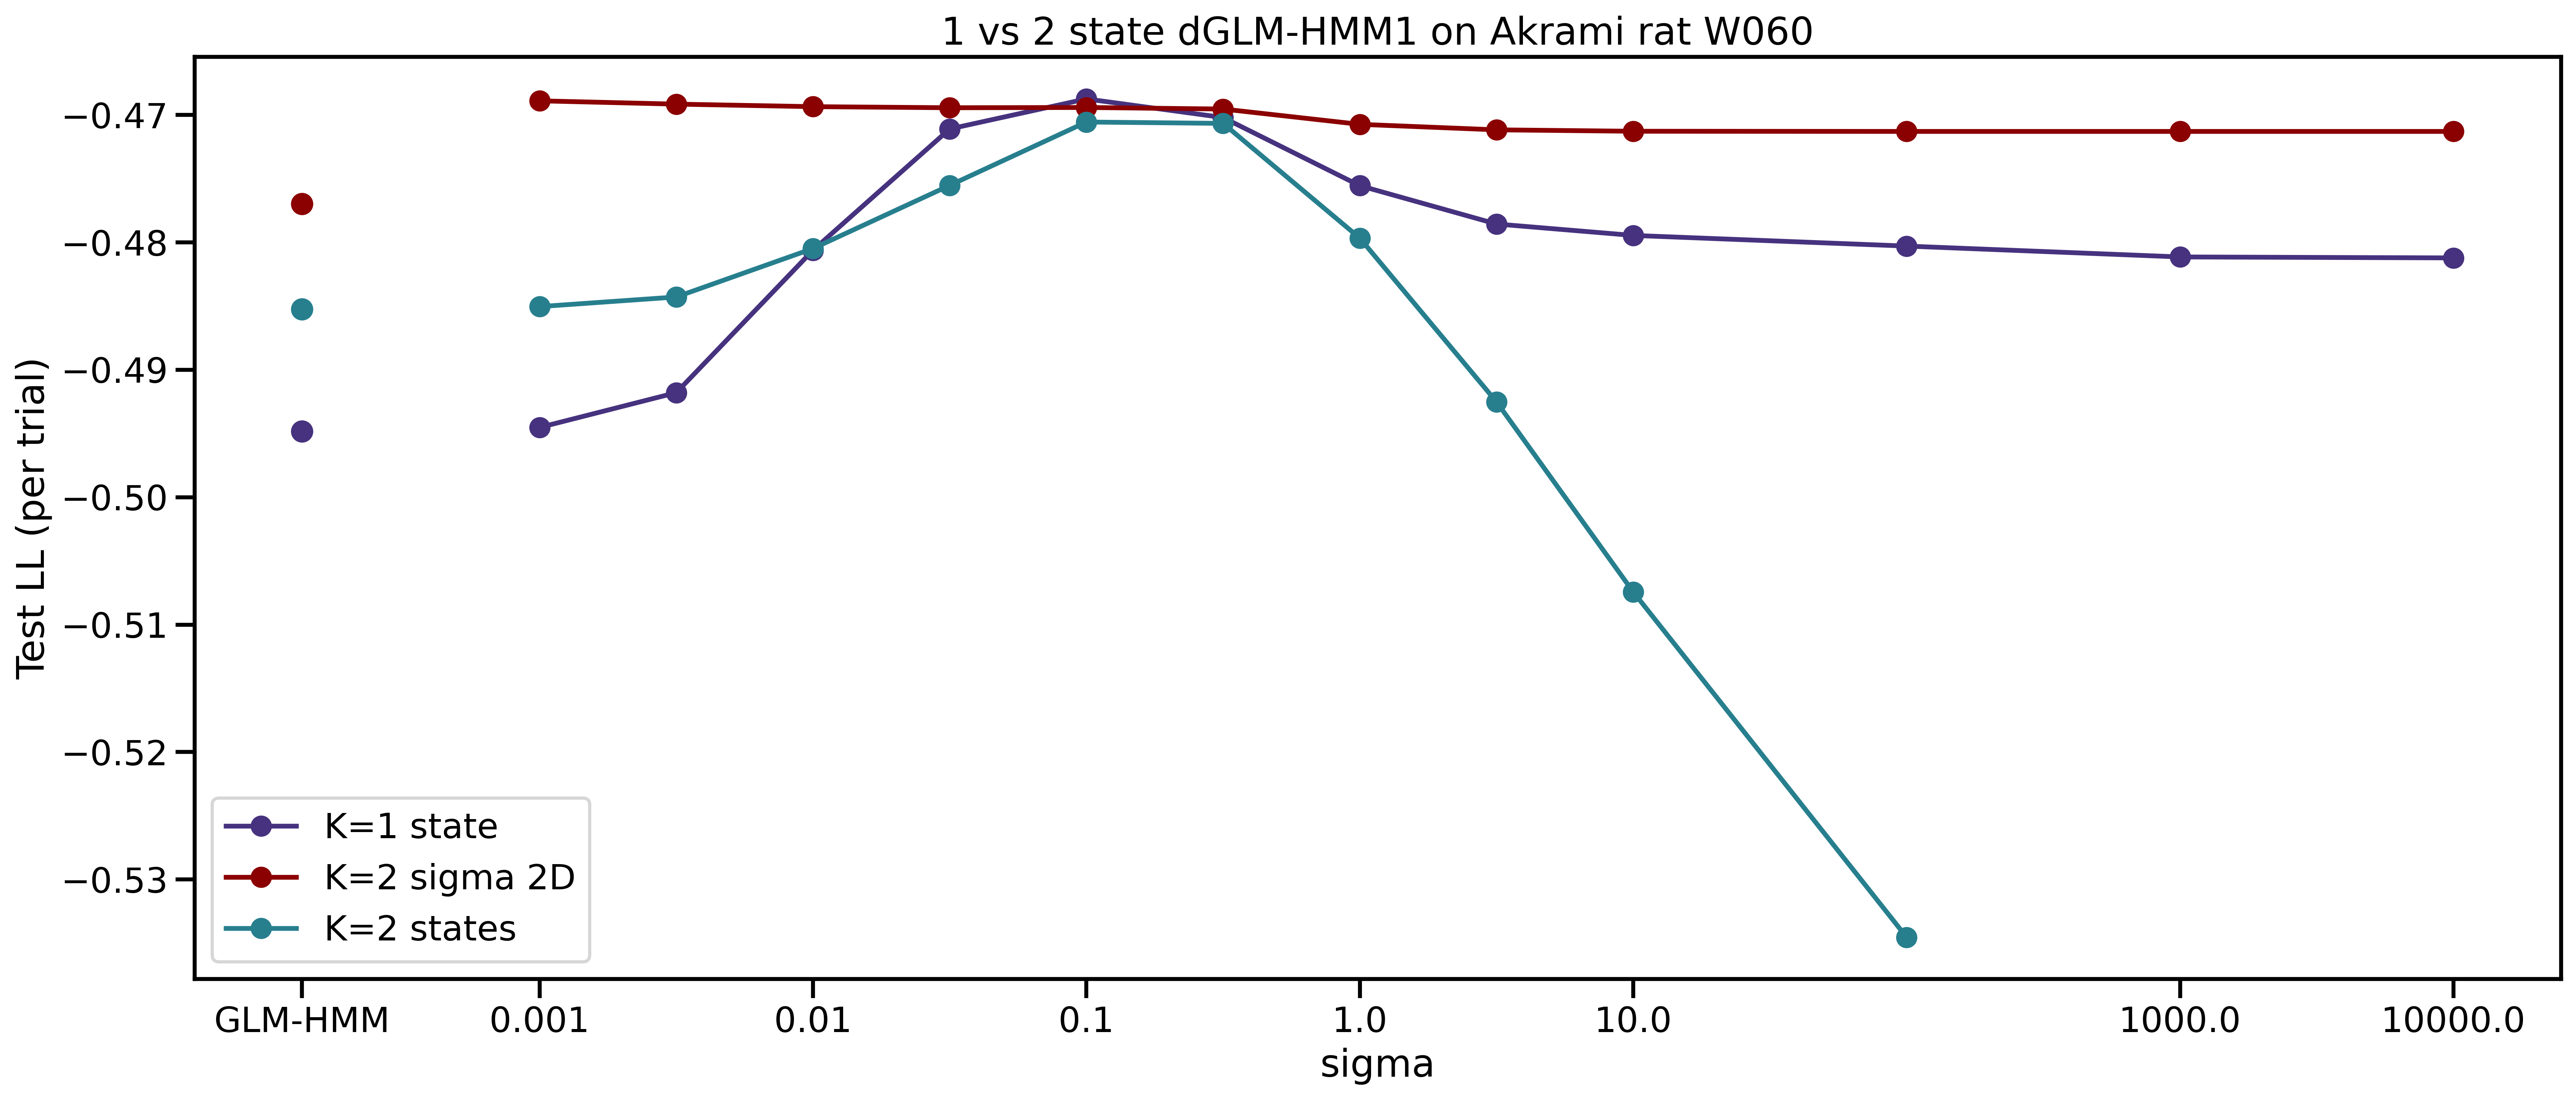

In [27]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# 1 vs 2 state test LL vs sigma for all animals
for animal in ['W060']:#animalsCurrent:
    fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
    sigma_CV_testLl_plot_PWM(rat_id=animal, stage_filter=3, K=1, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 state dGLM-HMM1 on Akrami rat {animal}', labels=['K=1 state'], color=0, penaltyW=True, save_fig=False)
    testLl = np.load(f'../data_PWM/testLl_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma.npy')
    axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color='darkred', label='K=2 sigma 2D')
    axes.scatter(-2 + np.log(sigmaList[1]), testLl[0], color='darkred')
    # testLl = np.load(f'../data_PWM/testLl_PWM_{animal}_sf=3_2_state_fold-0_multiple_sigmas_L2penaltyW=1.npy')
    # axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color='red', label='K=2 best Lenca init')
    # axes.scatter(-2 + np.log(sigmaList[1]), testLl[0], color='red')
    sigma_CV_testLl_plot_PWM(rat_id=animal, stage_filter=3, K=2, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 state dGLM-HMM1 on Akrami rat {animal}', labels=['K=2 states'], color=2, penaltyW=True, save_fig=False)


(13, 100835, 2, 6, 2)
91566


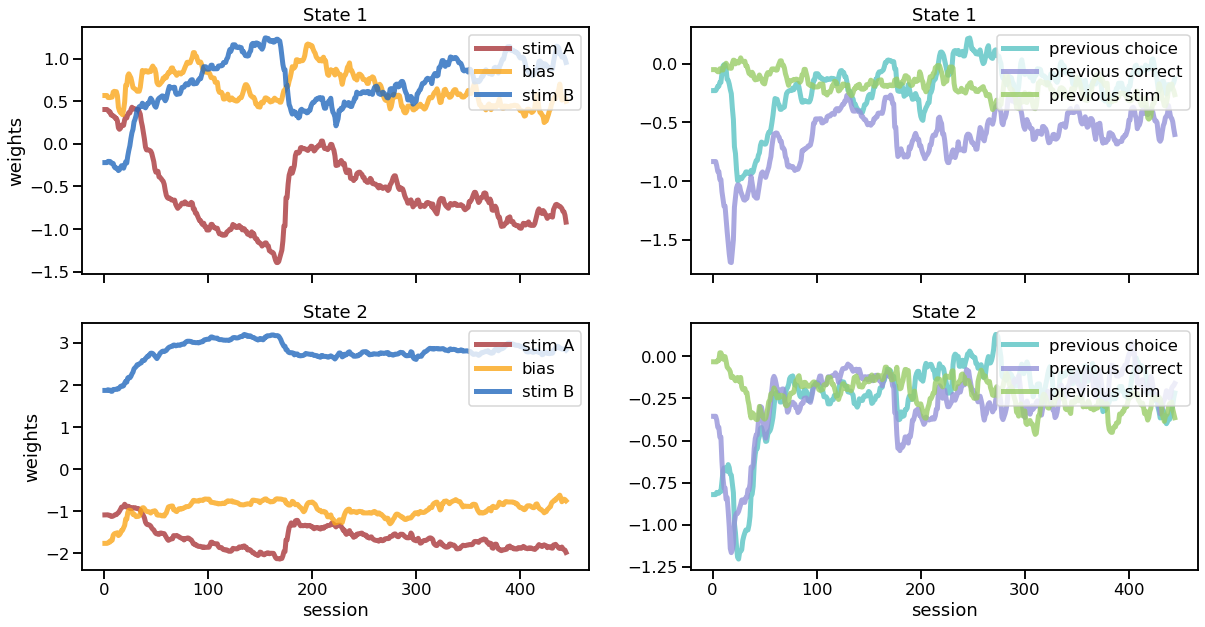

In [75]:
rat_id='W060'
K=2
W = np.load(f'../data_PWM/W_PWM_W075_sf=3_{K}_state_fold-0_multiple_sigmas_L2penaltyW=1.npy')
print(W.shape)
trainSessInd = np.load(f'../data_PWM/trainSessInd_PWM_{rat_id}_sf=3_{K}_state_fold-0_multiple_sigmas_penaltyW=True.npy')
print(trainSessInd[-1])
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(20,10))
plotting_weights_PWM(w=W[5], sessInd=trainSessInd, axes=axes, sessStop=None, title=f'Weights for animal {rat_id} with {K} state & sigma=0', save_fig=False)

/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/plotting_utils.py:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color=colormap[color+fold], linestyle=linestyle, label=labels[fold])
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/plotting_utils.py:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.log(sigmaList[1:]), testLl[1:], '-o', color=colormap[color+fold], linestyle=linestyle, label=labels[fold])
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/plotting_utils.py:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will

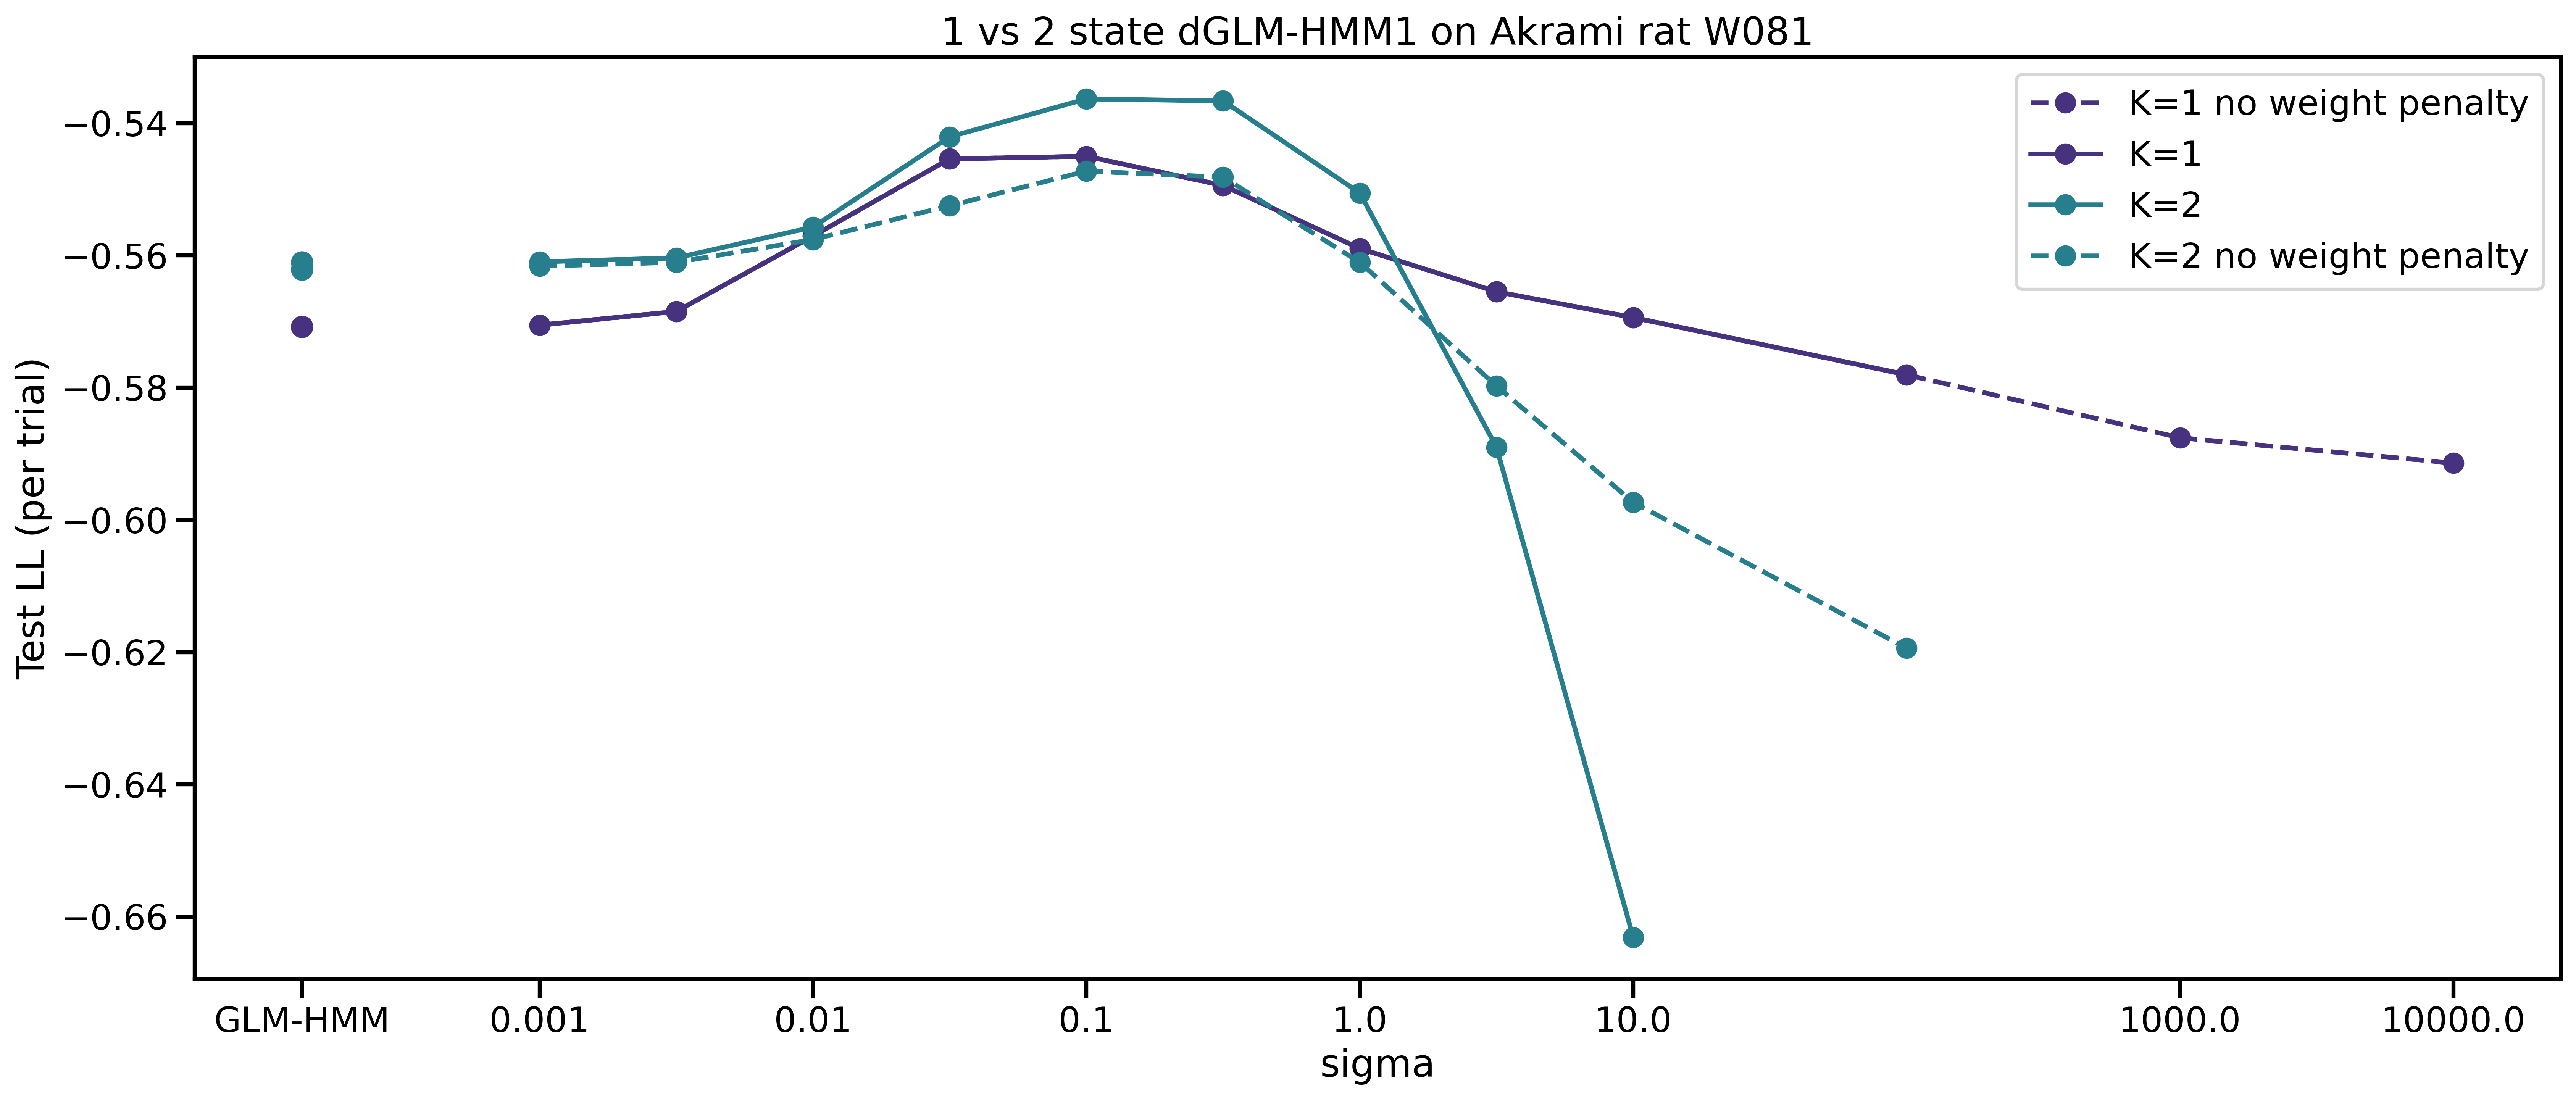

In [6]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
sigma_CV_testLl_plot_PWM(rat_id='W081', stage_filter=3, K=1, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 state dGLM-HMM1 on Akrami rat W081', labels=['K=1 no weight penalty'], color=0, linestyle='dashed', penaltyW=False, save_fig=False)
sigma_CV_testLl_plot_PWM(rat_id='W081', stage_filter=3, K=1, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 state dGLM-HMM1 on Akrami rat W081', labels=['K=1'], color=0, penaltyW=True, save_fig=False)
sigma_CV_testLl_plot_PWM(rat_id='W081', stage_filter=3, K=2, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 state dGLM-HMM1 on Akrami rat W081', labels=['K=2'], color=2, penaltyW=True, save_fig=False)
sigma_CV_testLl_plot_PWM(rat_id='W081', stage_filter=3, K=2, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 state dGLM-HMM1 on Akrami rat W081', labels=['K=2 no weight penalty'], color=2, linestyle='dashed', penaltyW=False, save_fig=True)

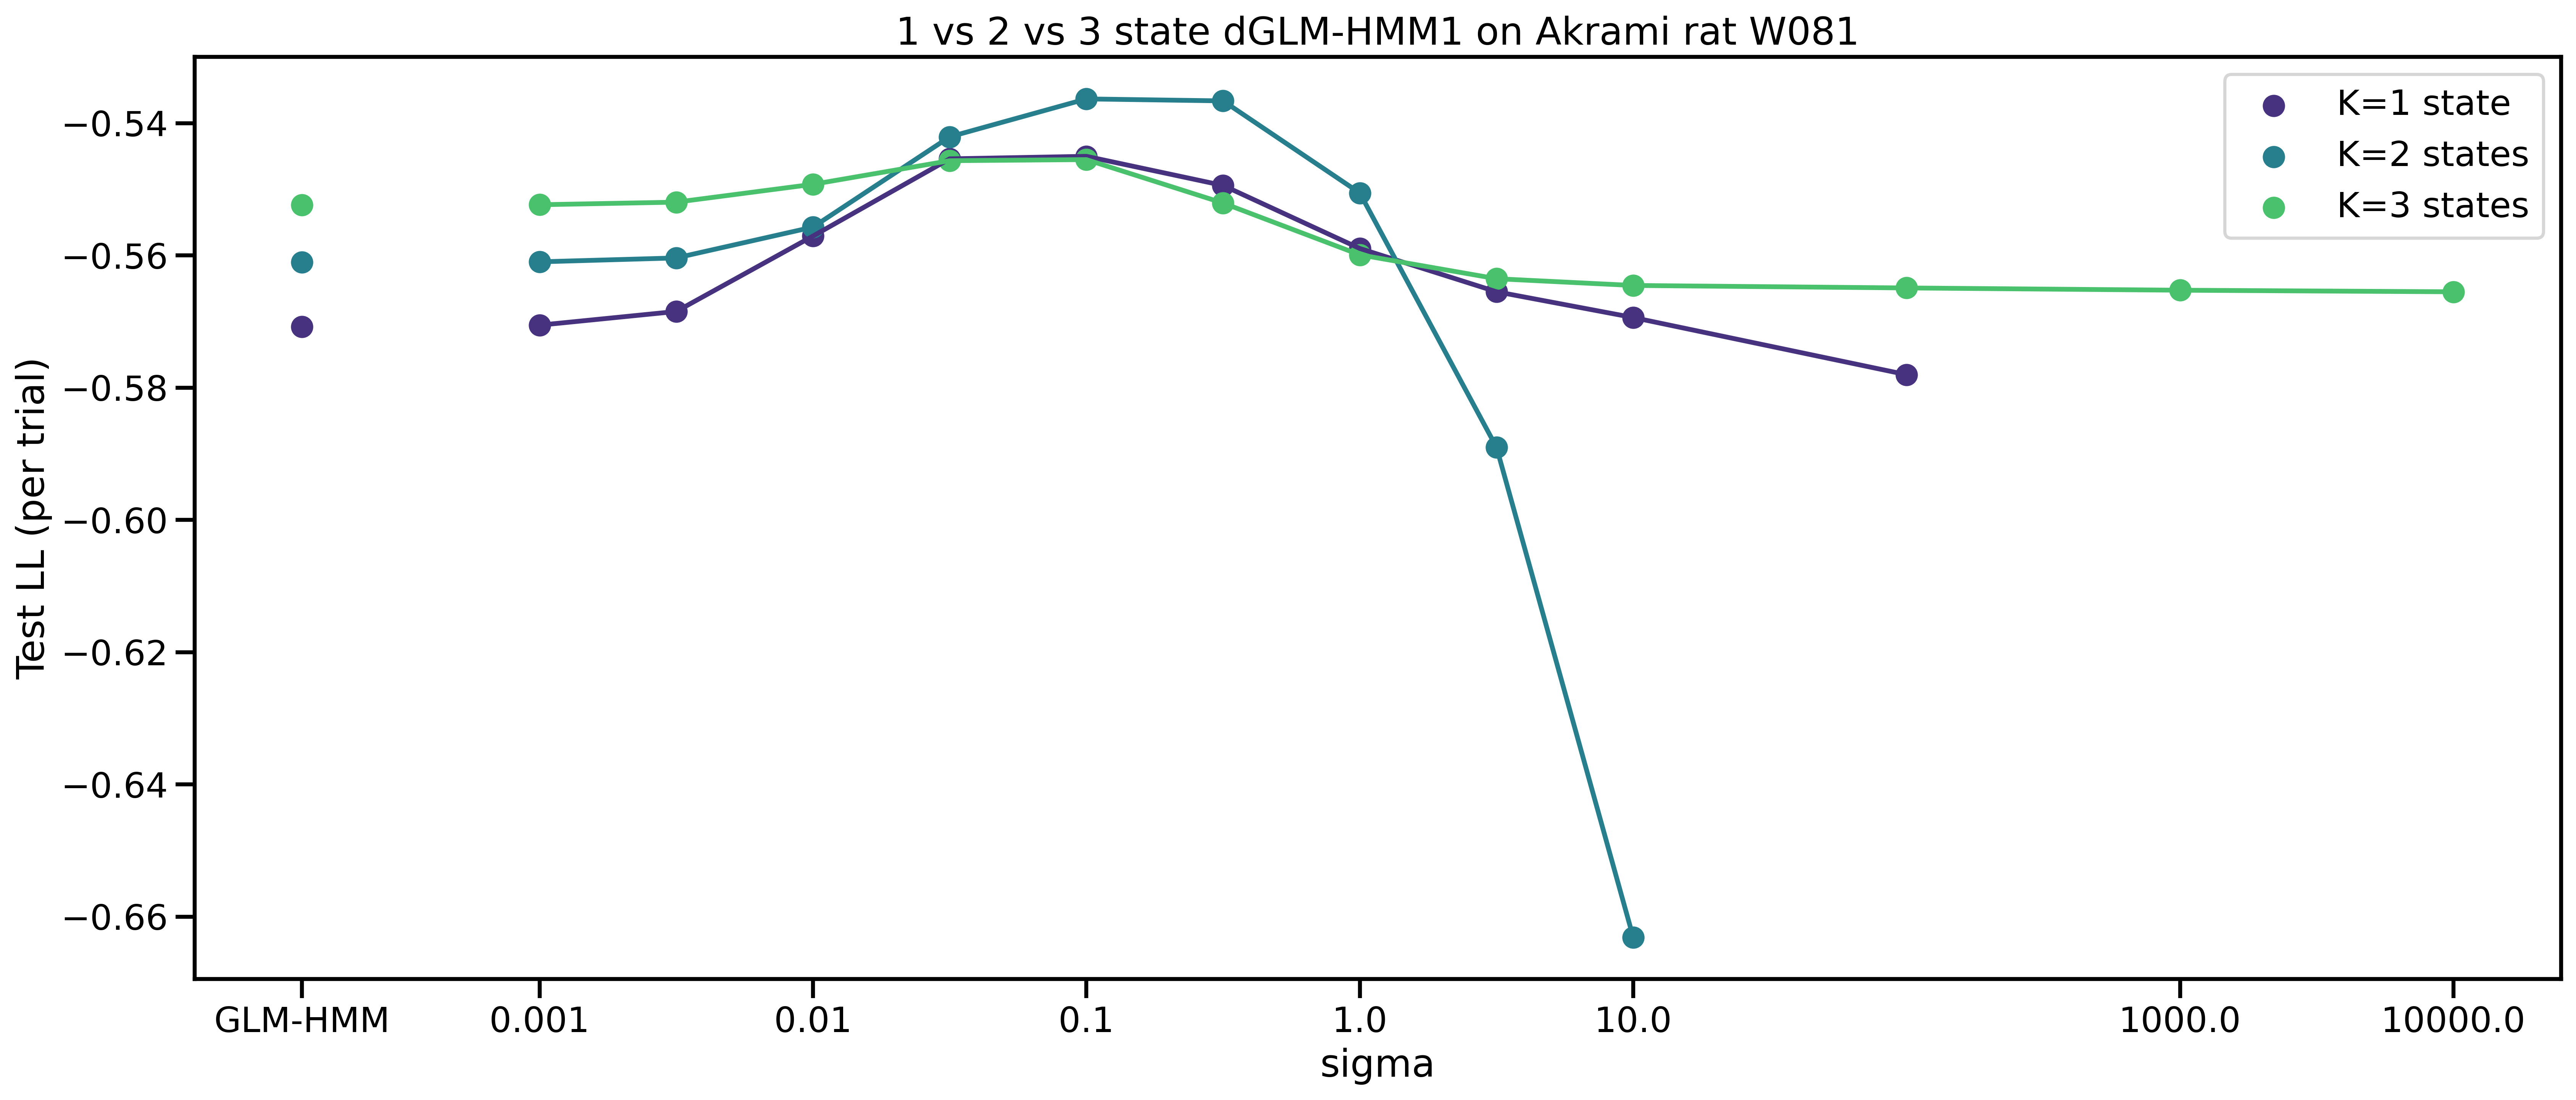

In [32]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
sigma_CV_testLl_plot_PWM(rat_id='W081', stage_filter=3, K=1, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 vs 3 state dGLM-HMM1 on Akrami rat W081', labels=['K=1 state'], color=0, penaltyW=True, save_fig=False)
sigma_CV_testLl_plot_PWM(rat_id='W081', stage_filter=3, K=2, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 vs 3 state dGLM-HMM1 on Akrami rat W081', labels=['K=2 states'], color=2, penaltyW=True, save_fig=False)
sigma_CV_testLl_plot_PWM(rat_id='W081', stage_filter=3, K=3, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 vs 3 state dGLM-HMM1 on Akrami rat W081', labels=['K=3 states'], color=4, penaltyW=True, save_fig=True)

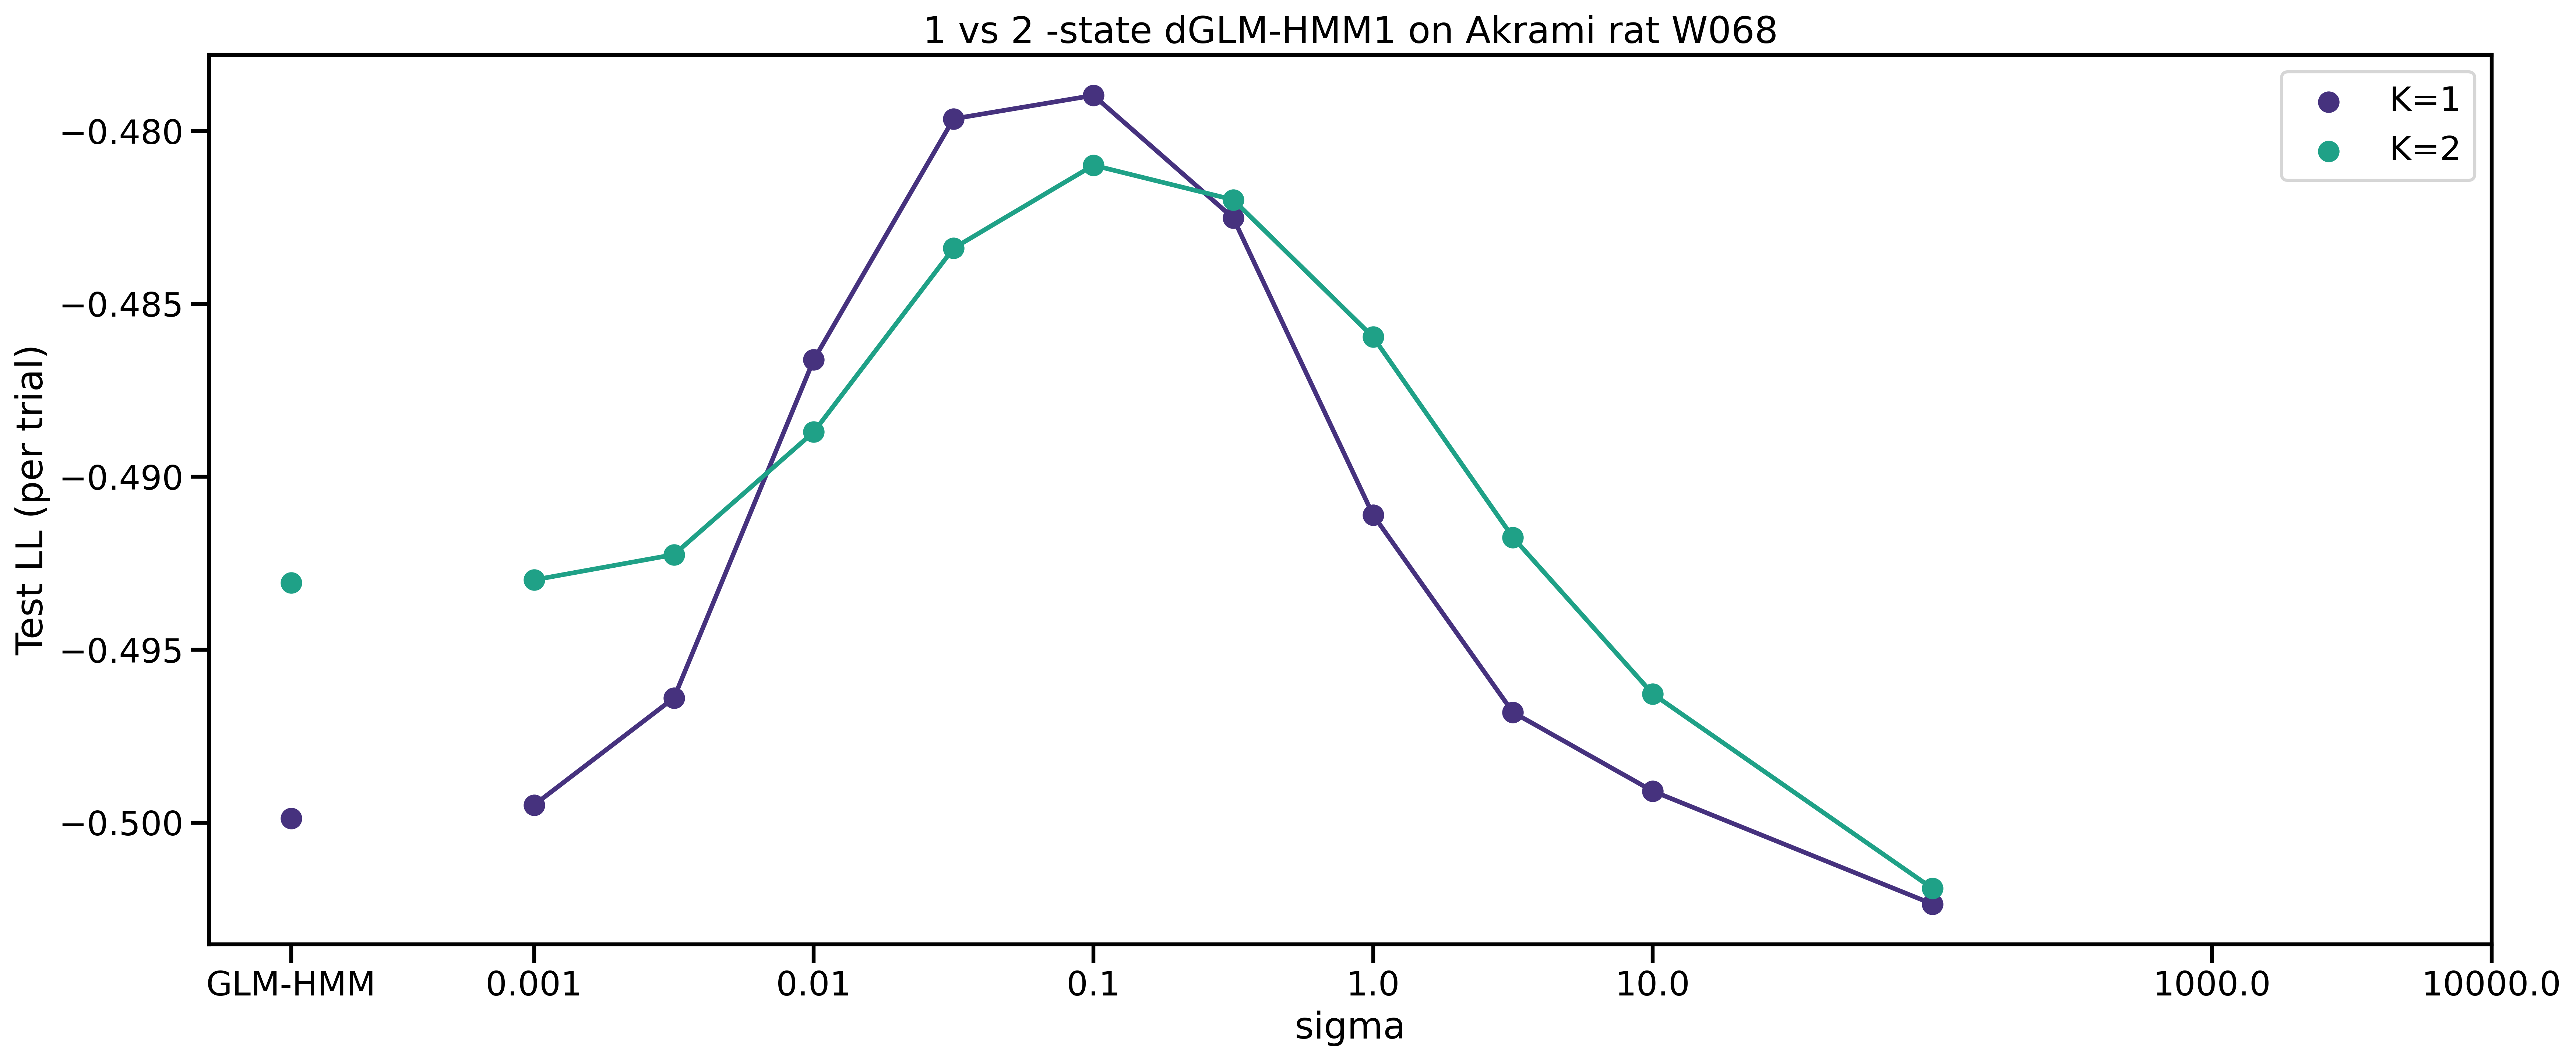

In [29]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
sigma_CV_testLl_plot_PWM(rat_id='W068', stage_filter=3, K=1, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 -state dGLM-HMM1 on Akrami rat W068', labels=['K=1'], color=0, penaltyW=True, save_fig=False)
sigma_CV_testLl_plot_PWM(rat_id='W068', stage_filter=3, K=2, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 -state dGLM-HMM1 on Akrami rat W068', labels=['K=2'], color=3, penaltyW=True, save_fig=False)

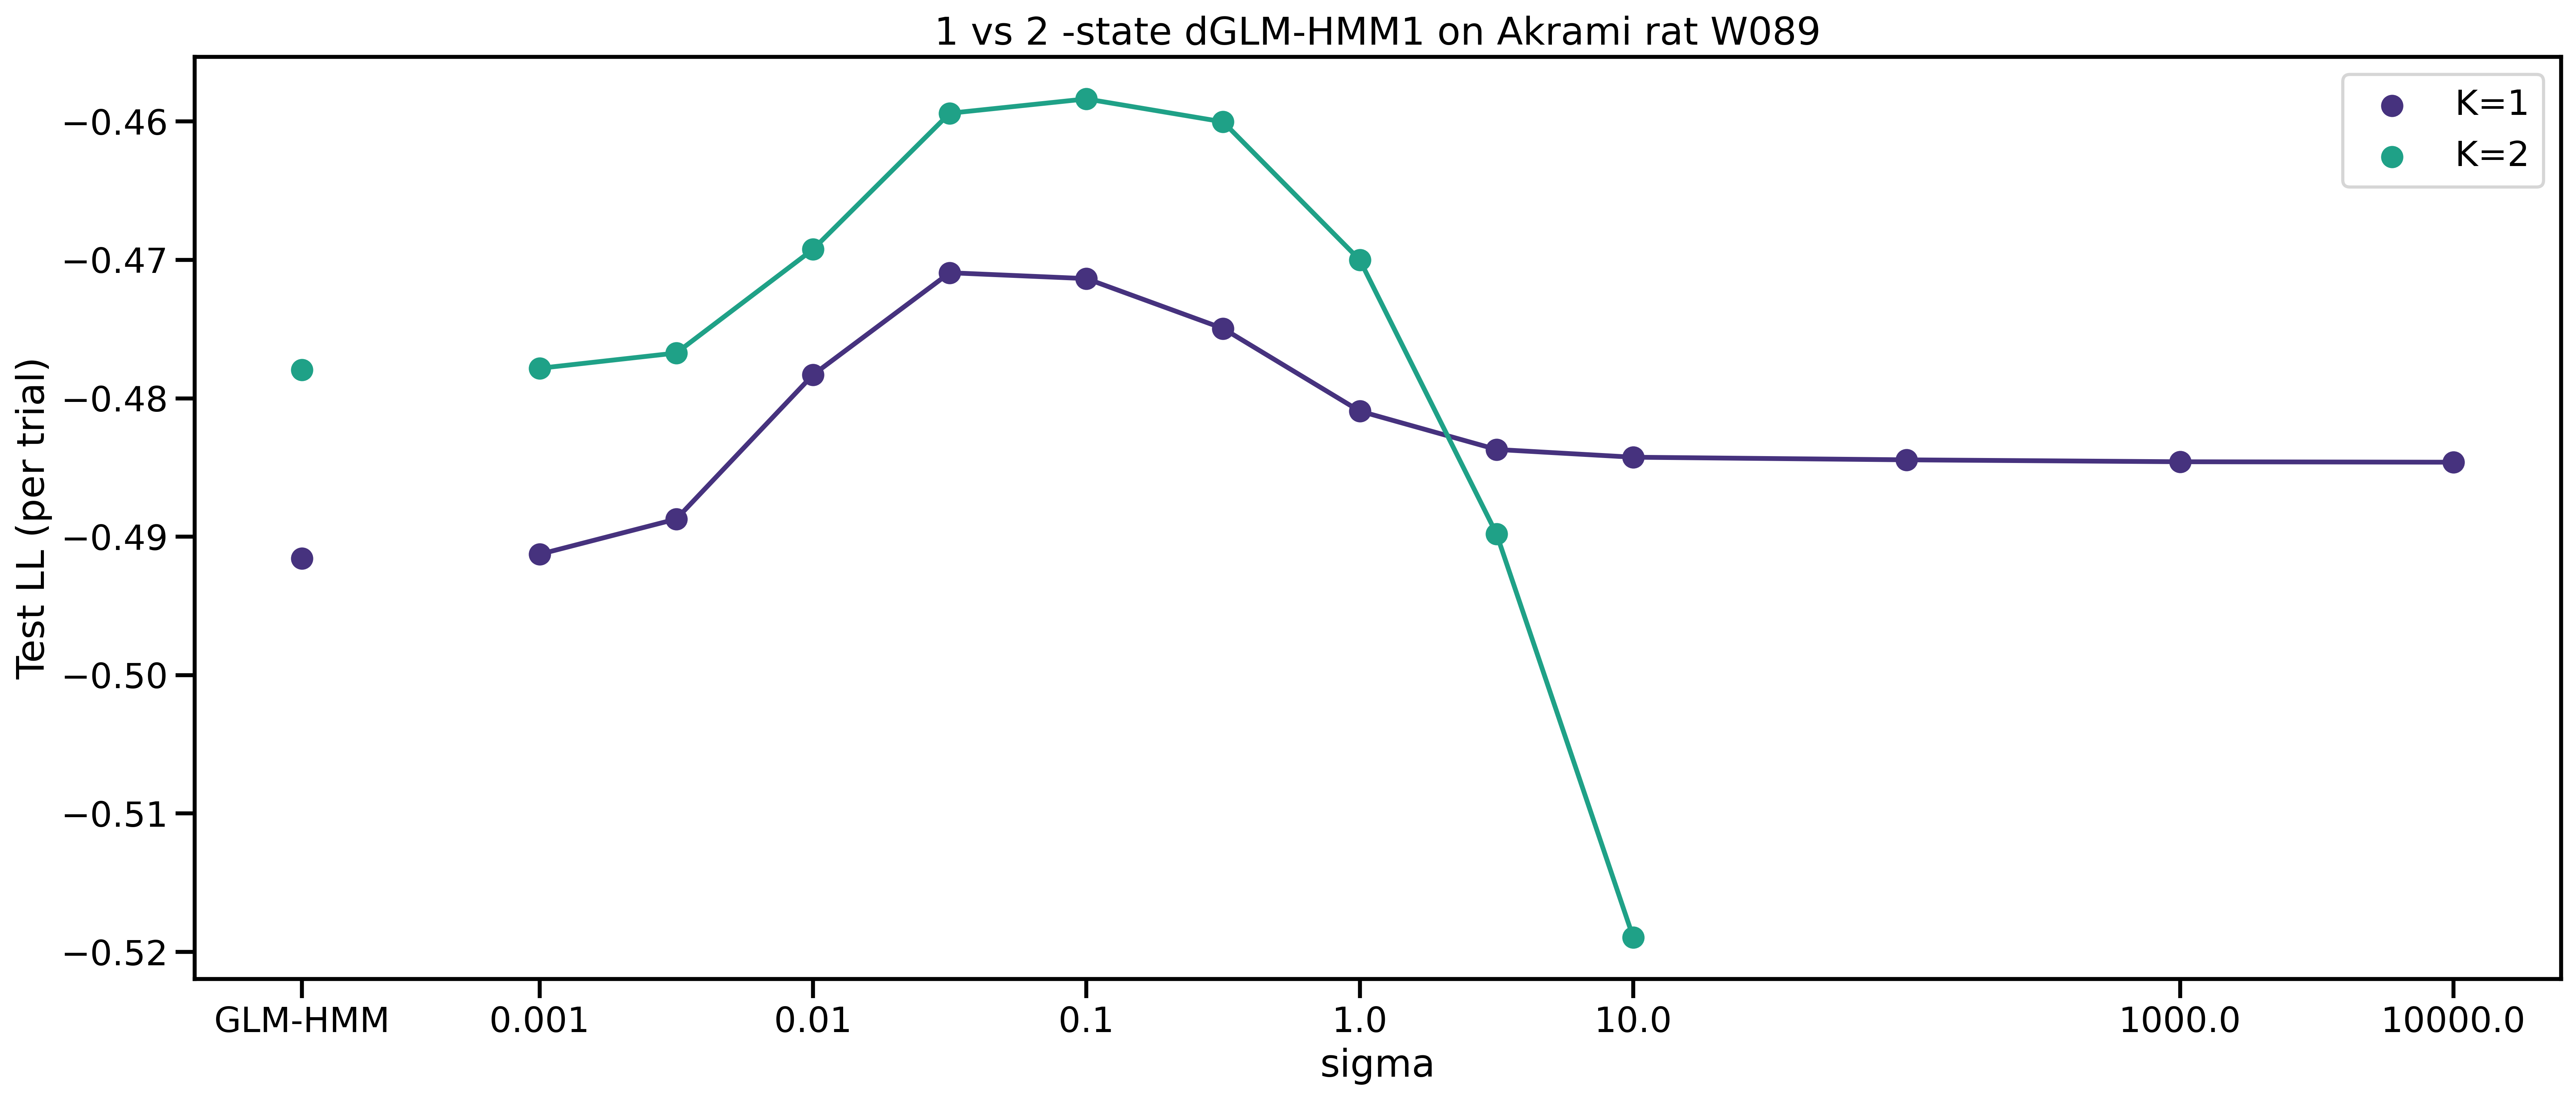

In [30]:
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
sigma_CV_testLl_plot_PWM(rat_id='W089', stage_filter=3, K=1, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 -state dGLM-HMM1 on Akrami rat W089', labels=['K=1'], color=0, penaltyW=True, save_fig=False)
sigma_CV_testLl_plot_PWM(rat_id='W089', stage_filter=3, K=2, folds=1, sigmaList=sigmaList, axes=axes, title=f'1 vs 2 -state dGLM-HMM1 on Akrami rat W089', labels=['K=2'], color=3, penaltyW=True, save_fig=False)

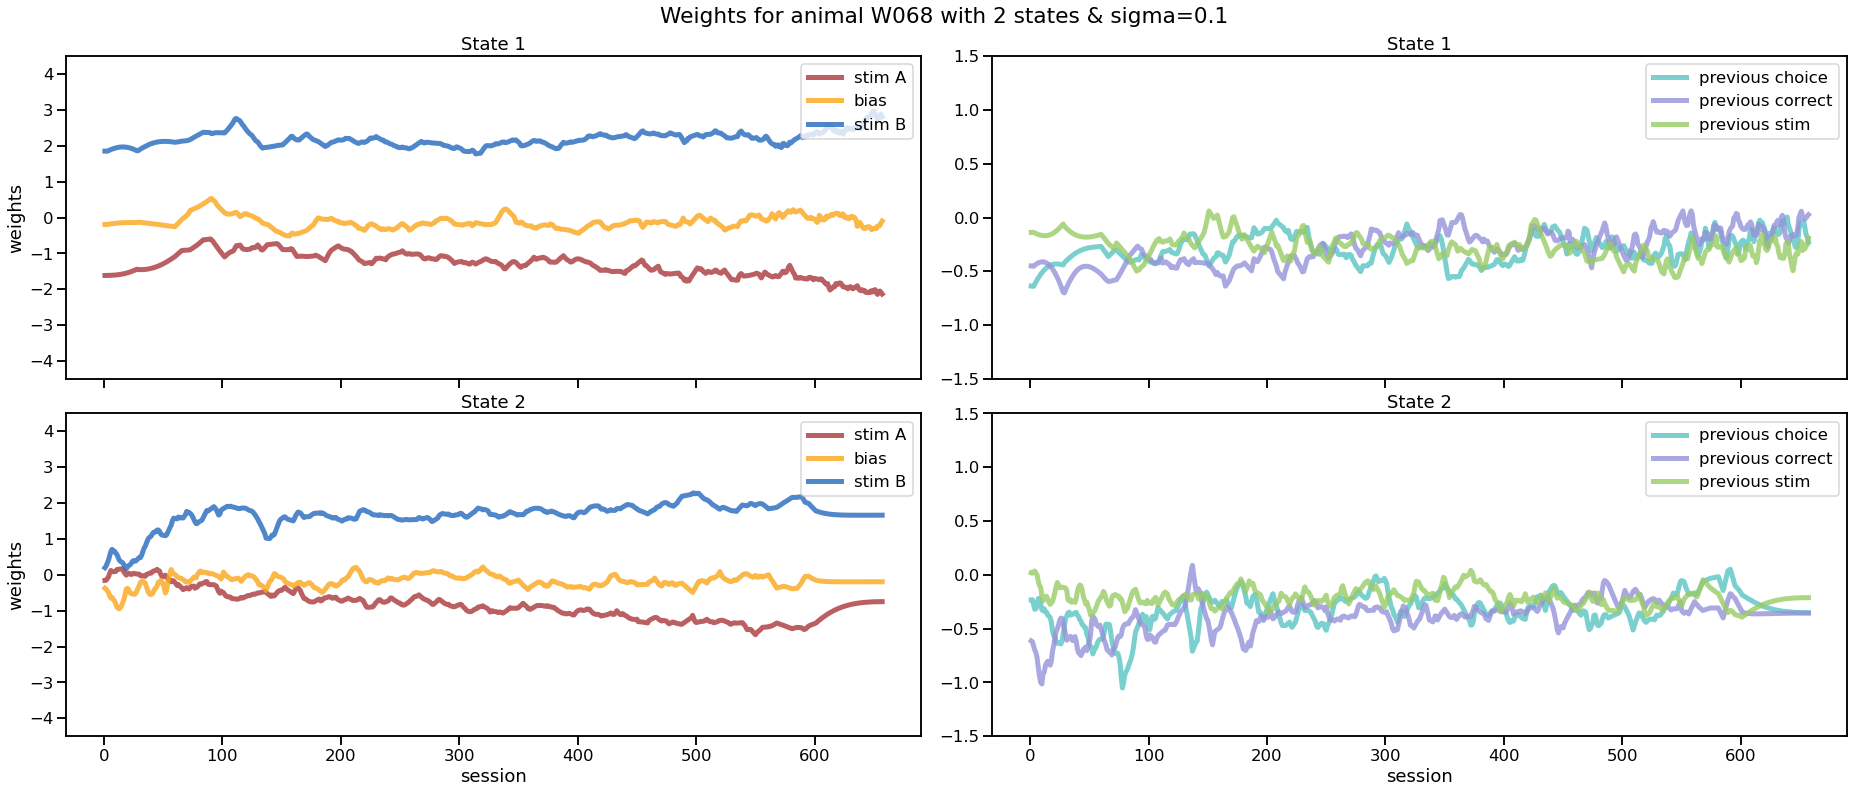

In [67]:
rat_id = 'W068'
stage_filter = 3
folds = 4
K = 2
penaltyW = True
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# PLOTTING WEIGHTS ACROSS MULTIPLE SIGMAS
for fold in range(0,1):
    trainSessInd = np.load(f'../data_PWM/trainSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
    allW = np.load(f'../data_PWM/W_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
    indSigma = 5
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(26,11))
    fig.suptitle(f'Weights for animal {rat_id} with {K} states & sigma={np.round(sigmaList[indSigma],4)}')
    fig.tight_layout()
    axes[0,0].set_ylim(-4.5,4.5)
    axes[1,0].set_ylim(-4.5,4.5)
    axes[0,1].set_ylim(-1.5,1.5)
    axes[1,1].set_ylim(-1.5,1.5)
    plotting_weights_PWM(w=allW[indSigma], sessInd=trainSessInd, axes=axes, sessStop=None, title=f'Weights for animal {rat_id} with {K} states & sigma={np.round(sigmaList[indSigma],4)}', save_fig=True)

[[1.00000000e+000 8.75364936e-117]
 [4.38490628e-015 1.00000000e+000]]


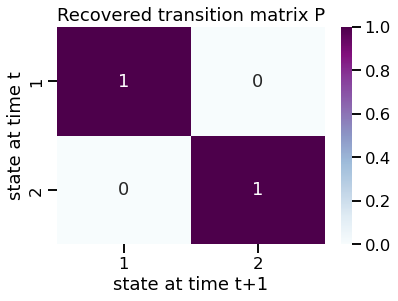

In [70]:
rat_id = 'W068'
stage_filter = 3
folds = 4
K = 2
penaltyW = True
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# PLOTTING Transition matrix P
for fold in range(0,1):
    allP = np.load(f'../data_PWM/P_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
    indSigma = 5
    print(allP[indSigma])
    s = sns.heatmap(np.round(allP[indSigma],4),annot=True,cmap='BuPu', fmt='g')
    s.set(xlabel='state at time t+1', ylabel='state at time t', title='Recovered transition matrix P', xticklabels=[1,2], yticklabels=[1,2])
    fig = s.get_figure()
    

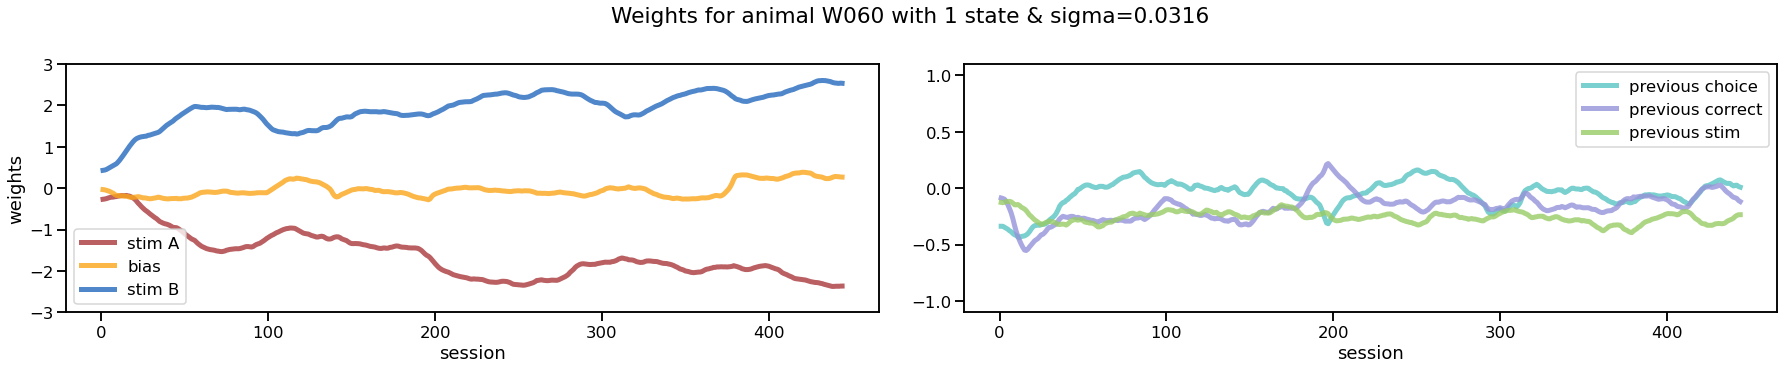

In [31]:
rat_id = 'W060'
stage_filter = 3
folds = 4
K = 1
penaltyW = True
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# PLOTTING WEIGHTS ACROSS MULTIPLE SIGMAS
for fold in range(0,1):
    trainSessInd = np.load(f'../data_PWM/trainSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
    testSessInd = np.load(f'../data_PWM/testSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
    allP = np.load(f'../data_PWM/P_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
    allW = np.load(f'../data_PWM/W_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
    indSigma = 4
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(25,5))
    axes[0].set_ylim(-3,3)
    axes[1].set_ylim(-1.1,1.1)
    fig.suptitle(f'Weights for animal {rat_id} with {K} state & sigma={np.round(sigmaList[indSigma],4)}')
    fig.tight_layout()
    plotting_weights_PWM(w=allW[indSigma], sessInd=trainSessInd, axes=axes, sessStop=None, title=f'Weights for animal {rat_id} with {K} state & sigma={np.round(sigmaList[indSigma],4)}', save_fig=True)
       

### L2PenaltyW = 1 (more recent fittings)

[[9.99933040e-01 6.69596091e-05]
 [1.04010362e-01 8.95989638e-01]]


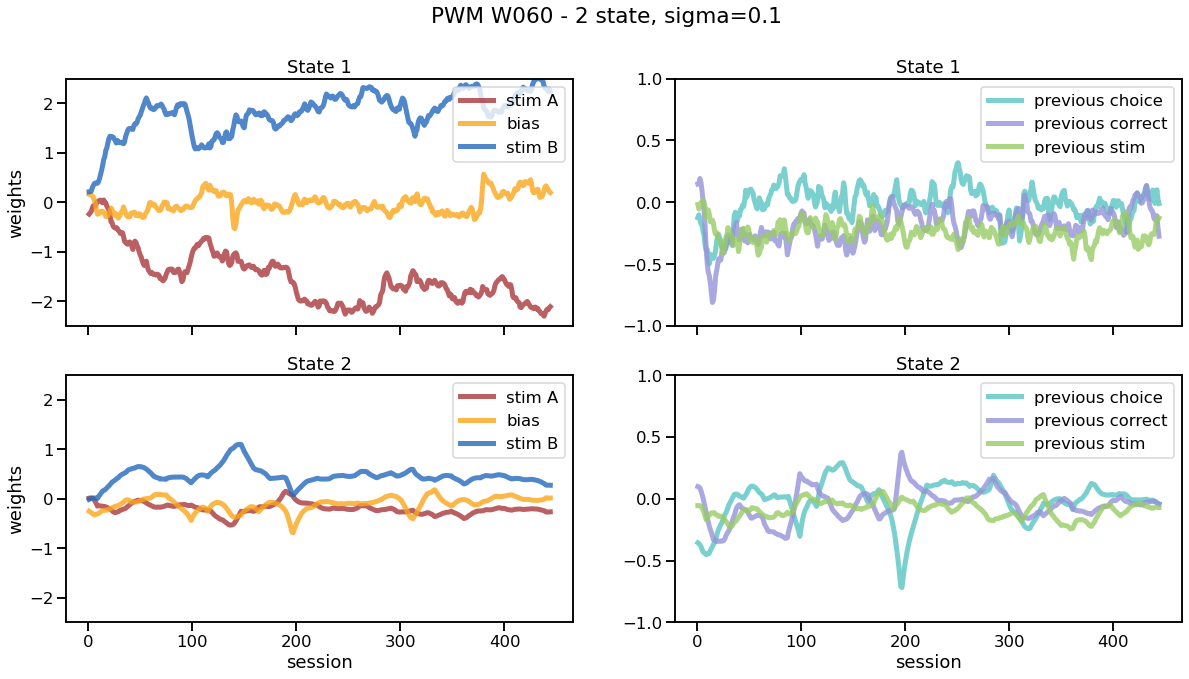

In [48]:
rat_id = 'W060'
stage_filter = 3
folds = 4
K = 2
L2penaltyW = 1
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# PLOTTING WEIGHTS ACROSS MULTIPLE SIGMAS
for fold in range(0,1):
    trainSessInd = np.load(f'../data_PWM/trainSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}.npy')
    testSessInd = np.load(f'../data_PWM/testSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}.npy')
    allP = np.load(f'../data_PWM/P_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}.npy')
    allW = np.load(f'../data_PWM/W_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}.npy')
    indSigma = 5
    print(allP[indSigma])
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(20,10))
    axes[0,0].set_ylim(-2.5,2.5)
    axes[1,0].set_ylim(-2.5,2.5)
    axes[0,1].set_ylim(-1,1)
    axes[1,1].set_ylim(-1,1)
    fig.suptitle(f'PWM {rat_id} - {K} state, sigma={np.round(sigmaList[indSigma],4)}')
    plotting_weights_PWM(w=allW[indSigma], sessInd=trainSessInd, axes=axes, sessStop=None, title=f'PWM {rat_id} - {K} state, sigma={np.round(sigmaList[indSigma],4)}', save_fig=False)

    # s = sns.heatmap(np.round(allP[indSigma],2),annot=True,cmap='BuPu', fmt='g')
    # s.set(xlabel='state at time t+1', ylabel='state at time t', title='Recovered transition matrix P', xticklabels=[1,2], yticklabels=[1,2])
    # fig = s.get_figure()
       

[[9.99933040e-01 6.69596091e-05]
 [1.04010362e-01 8.95989638e-01]]


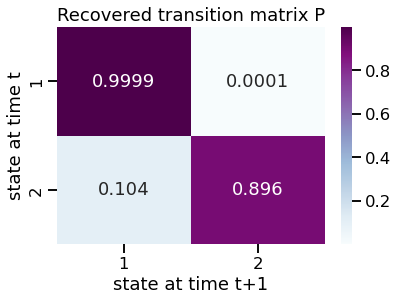

In [81]:
rat_id = 'W060'
stage_filter = 3
folds = 4
K = 2
L2penaltyW = 1
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# PLOTTING Transition matrix P
for fold in range(0,1):
    allP = np.load(f'../data_PWM/P_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}.npy')
    indSigma = 5
    print(allP[indSigma])
    s = sns.heatmap(np.round(allP[indSigma],4),annot=True,cmap='BuPu', fmt='g')
    s.set(xlabel='state at time t+1', ylabel='state at time t', title='Recovered transition matrix P', xticklabels=[1,2], yticklabels=[1,2])
    fig = s.get_figure()

### 2D SIGMA Fit for animal W060

### 1D SIGMA Fit for animal W060 starting from fixed first state with sigma=0.1 (two different sigmas for each state)

In [5]:
# Var 1 uses bestGLMHMM for P
# Var 2 uses 0.9

rat_id = 'W060'
stage_filter = 3
folds = 4
K = 1
penaltyW = True
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] # + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# PLOTTING WEIGHTS ACROSS MULTIPLE SIGMAS
fold = 0
trainSessInd = np.load(f'../data_PWM/trainSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
testSessInd = np.load(f'../data_PWM/testSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
allP = np.load(f'../data_PWM/P_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')
allW = np.load(f'../data_PWM/W_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_penaltyW={penaltyW}.npy')

K = 2
animal = 'W060'
glmhmmP = np.load(f'../data_PWM/P_PWM_bestGLMHMM-Iris_{animal}_sf=3_{K}_state_untilSession250.npy') # no var in name
#glmhmmP = np.array([0.95,0.05,0.05,0.95]).reshape(2,2) # Var 1 & 2
glmhmmW = np.load(f'../data_PWM/W_PWM_bestGLMHMM-Iris_{animal}_sf=3_{K}_state_untilSession250.npy')
mixedGlmhmmW = np.zeros((allW.shape[1],K,allW.shape[3],allW.shape[4]))
mixedGlmhmmW[:,0,:,:] = allW[5].reshape((mixedGlmhmmW.shape[0],mixedGlmhmmW.shape[2],mixedGlmhmmW.shape[3])) # 1 state from K=1 GLM fit - Var 1 
#mixedGlmhmmW[:,0,:,:] = allW[4].reshape((mixedGlmhmmW.shape[0],mixedGlmhmmW.shape[2],mixedGlmhmmW.shape[3])) # 1 state from K=1 GLM fit - Var 2
mixedGlmhmmW[:,1,:,:] = glmhmmW[-1,1,:,:] # 2nd state from best GLMHMM fit

nfolds = 4
maxiter = 10
L2penaltyW=1
path=laptop_path
save=True

x, y = io_utils.prepare_design_matrices(rat_id=rat_id, path=path, psychometric=True, cutoff=10, stage_filter=stage_filter, overwrite=False)
sessInd = list(io_utils.session_start(rat_id=rat_id, path=path, psychometric=True, cutoff=10, stage_filter=stage_filter)) 
trainX, trainY, trainSessInd, testX, testY, testSessInd = split_data_per_session(x, y, sessInd, folds=folds, random_state=1)
D = trainX[0].shape[1]
C = 2 # only looking at binomial classes

# fold = 0
# N = trainX[fold].shape[0]
# dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
# trainY[fold] = trainY[fold].astype(int)
# allP[fold][indSigma],  allW[fold][indSigma], trainLl[fold][indSigma] = dGLM_HMM.fit(trainX[fold], trainY[fold],  glmhmmP, mixedGlmhmmW, sigma=reshapeSigma(0.05, K, D), sessInd=trainSessInd[fold], pi0=None, maxIter=maxiter, tol=1e-3, L2penaltyW=L2penaltyW, priorDirP = [10,1]) # fit the model
        

trainLl = [np.zeros((len(sigmaList), maxiter)) for i in range(0,folds)] 
testLl = [np.zeros((len(sigmaList))) for i in range(0,folds)]
allP = [np.zeros((len(sigmaList), K,K)) for i in range(0,folds)] 
allW = [] 

sigmaMixed = [np.array([0.1,x]).reshape((K,1)) for x in sigmaList] # - Var 1
# sigmaMixed = [np.array([0.08,x]).reshape((K,1)) for x in sigmaList] # - Var 2

priorDirP = [1000,100]

for fold in [0]: # fitting single fold     # fittinng all folds -> range(0,folds): 
    # initializing parameters for each fold
    N = trainX[fold].shape[0]
    oneSessInd = [0,N] # treating whole dataset as one session for normal GLM-HMM fitting
    dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
    allW.append(np.zeros((len(sigmaList), N,K,D,C)))
    trainY[fold] = trainY[fold].astype(int)
    testY[fold] = testY[fold].astype(int)

    for indSigma in range(0,len(sigmaList)): 
        print("Sigma Index " + str(indSigma))
        if (indSigma == 0): 
            allP[fold][indSigma] = np.copy(glmhmmP)
            allW[fold][indSigma] = np.copy(mixedGlmhmmW)               
        else:
            # initializing from previoous fit
            initP = allP[fold][indSigma-1] 
            initW = allW[fold][indSigma-1] 
            
            # fitting dGLM-HMM
            allP[fold][indSigma],  allW[fold][indSigma], trainLl[fold][indSigma] = dGLM_HMM.fit(trainX[fold], trainY[fold],  initP, initW, sigma=reshapeSigma(sigmaMixed[indSigma], K, D), sessInd=trainSessInd[fold], pi0=None, maxIter=maxiter, tol=1e-3, L2penaltyW=L2penaltyW, priorDirP = priorDirP) # fit the model
        
        # evaluate
        sess = len(trainSessInd[fold]) - 1 # number sessions
        testPhi = dGLM_HMM.observation_probability(testX[fold], reshapeWeights(allW[fold][indSigma], trainSessInd[fold], testSessInd[fold]))
        for s in range(0, sess):
            # evaluate on test data for each session separately
            _, _, temp = dGLM_HMM.forward_pass(testY[fold][testSessInd[fold][s]:testSessInd[fold][s+1]],allP[fold][indSigma],testPhi[testSessInd[fold][s]:testSessInd[fold][s+1]])
            testLl[fold][indSigma] += temp
        
        testLl[fold][indSigma] = testLl[fold][indSigma] / testSessInd[fold][-1] # normalizing to the total number of trials in test dataset

        print(allP[0][indSigma])
        print(testLl[0][indSigma])


        if(save==True):
            np.save(f'../data_PWM/trainLl_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma-var1', trainLl[fold])
            np.save(f'../data_PWM/testLl_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma-var1', testLl[fold])
            np.save(f'../data_PWM/P_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma-var1', allP[fold])
            np.save(f'../data_PWM/W_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma-var1', allW[fold])
            np.save(f'../data_PWM/trainSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma-var1', np.array(trainSessInd[fold]))
            np.save(f'../data_PWM/testSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma-var1', np.array(testSessInd[fold]))


Sigma Index 0
[[0.99720267 0.00279733]
 [0.00575653 0.99424347]]
-0.475228572931143
Sigma Index 1
0
[[0.99408683 0.00591317]
 [0.13614012 0.86385988]]
-0.4701286740760719
Sigma Index 2
0
[[0.99286905 0.00713095]
 [0.15601378 0.84398622]]
-0.4704678815098451
Sigma Index 3
0
[[0.99269222 0.00730778]
 [0.16090969 0.83909031]]
-0.4706894410501736
Sigma Index 4
0
[[0.99273523 0.00726477]
 [0.16162725 0.83837275]]
-0.4707959046027752
Sigma Index 5
0
[[0.99291292 0.00708708]
 [0.15777103 0.84222897]]
-0.47077811728205154
Sigma Index 6
0


KeyboardInterrupt: 

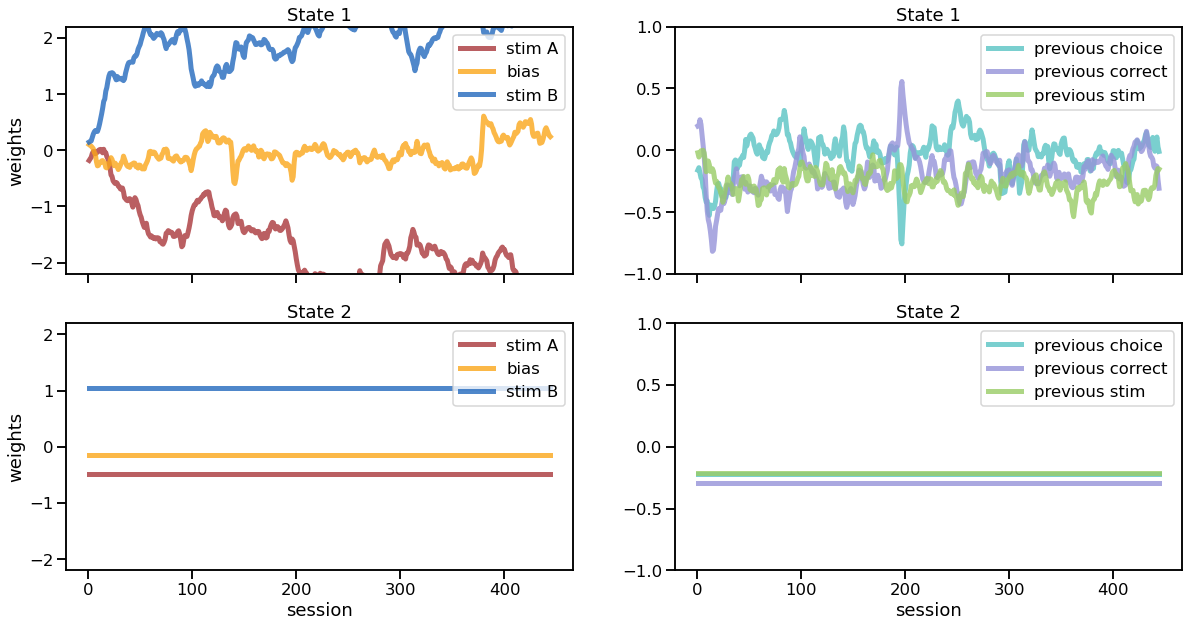

In [9]:
# permuting states according to absolute value of sensory across sessions
# CHECK PERMUTE STATES
w = np.load('')
p = allP[0][0]
sessInd = trainSessInd[0]

sortedStateInd = permute_states(w, sessInd)
w = w[:,sortedStateInd,:,:]
p = p[sortedStateInd,:][:,sortedStateInd]

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(20,10))
axes[0,0].set_ylim(-2.2,2.2)
axes[1,0].set_ylim(-2.2,2.2)
axes[0,1].set_ylim(-1,1)
axes[1,1].set_ylim(-1,1)
# fig.suptitle(f'PWM {rat_id} - {K} state, sigma={np.round(sigmaList[indSigma],4)}')
plotting_weights_PWM(w=w, sessInd=sessInd, axes=axes, sessStop=None, title=f'PWM {rat_id} - {K} state, sigma=', save_fig=False)


In [10]:
allP = np.load(f'../data_PWM/P_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma.npy')
allW = np.load(f'../data_PWM/W_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma.npy')
testLl = np.load(f'../data_PWM/testLl_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_mixedSigma.npy')
print(testLl)
        

[-0.47696793 -0.46888741 -0.46914577 -0.46934501 -0.46942993 -0.4694091
 -0.46953152 -0.47073222 -0.47116421 -0.47127489 -0.47128972 -0.47128983
 -0.47128981]


[[1.]]
[[1.]]
[[1.]]
[[1.]]


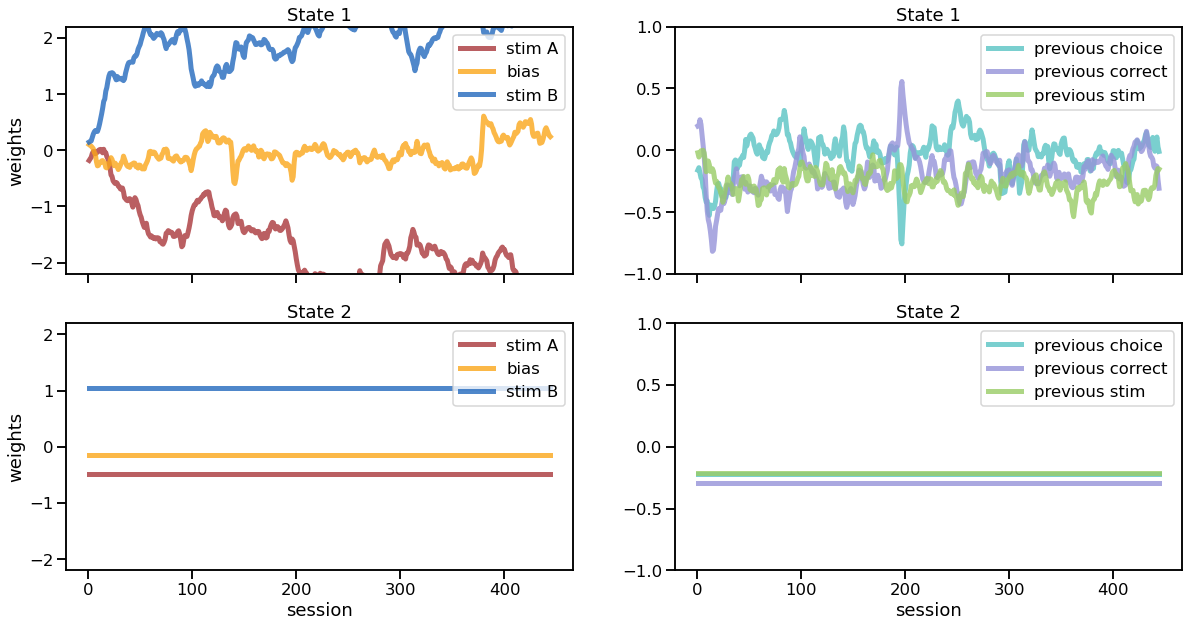

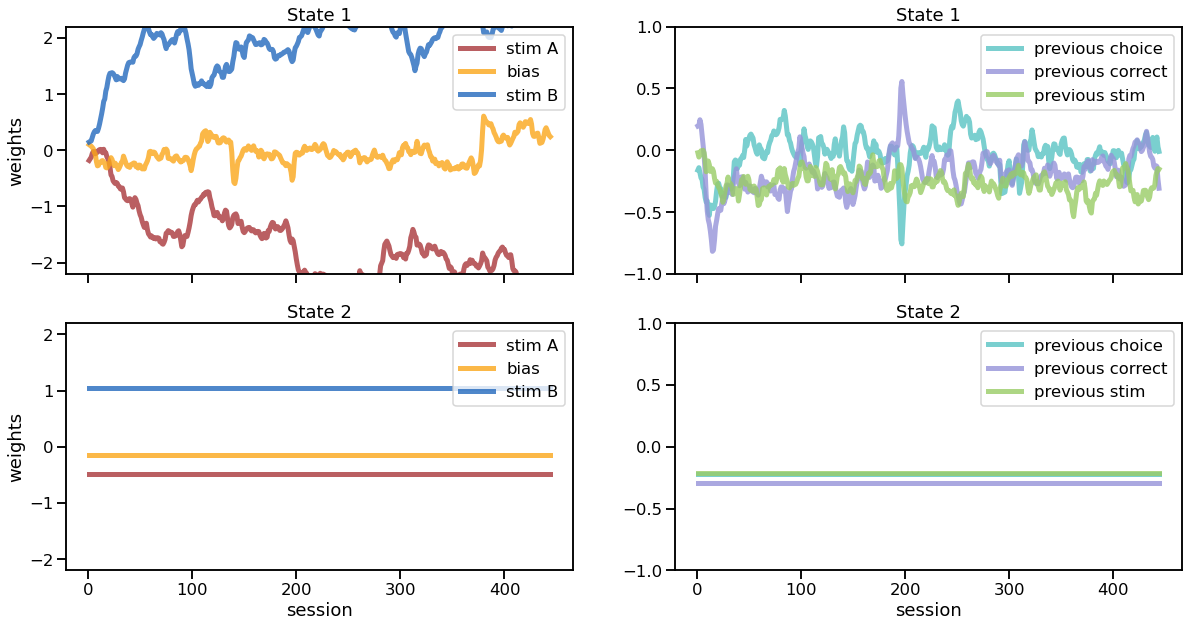

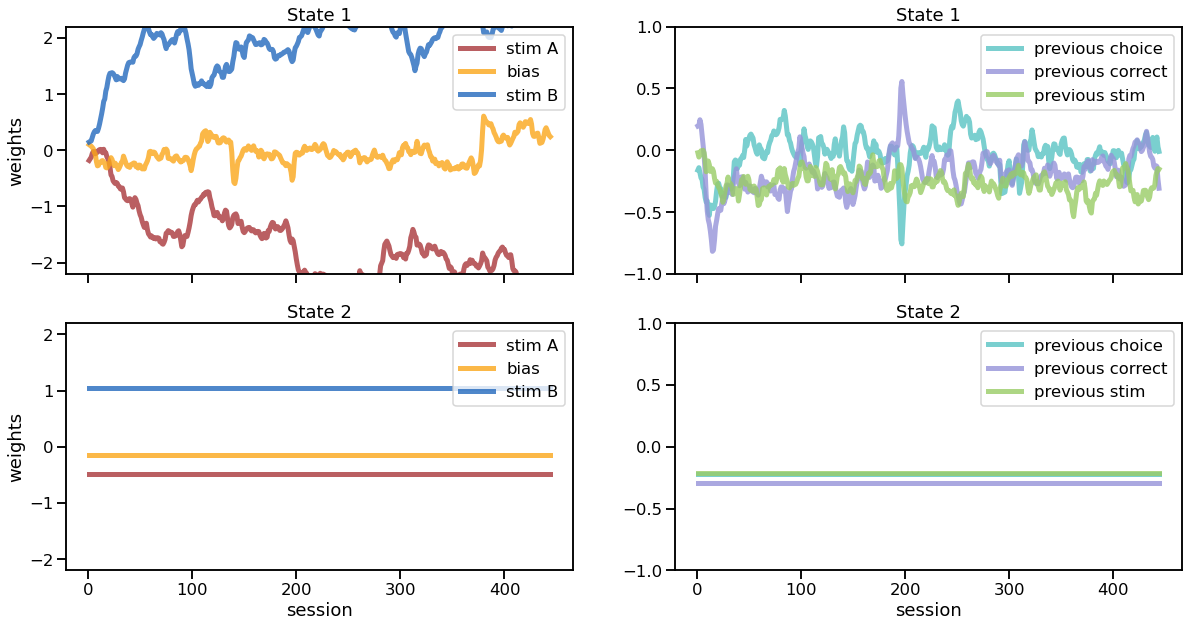

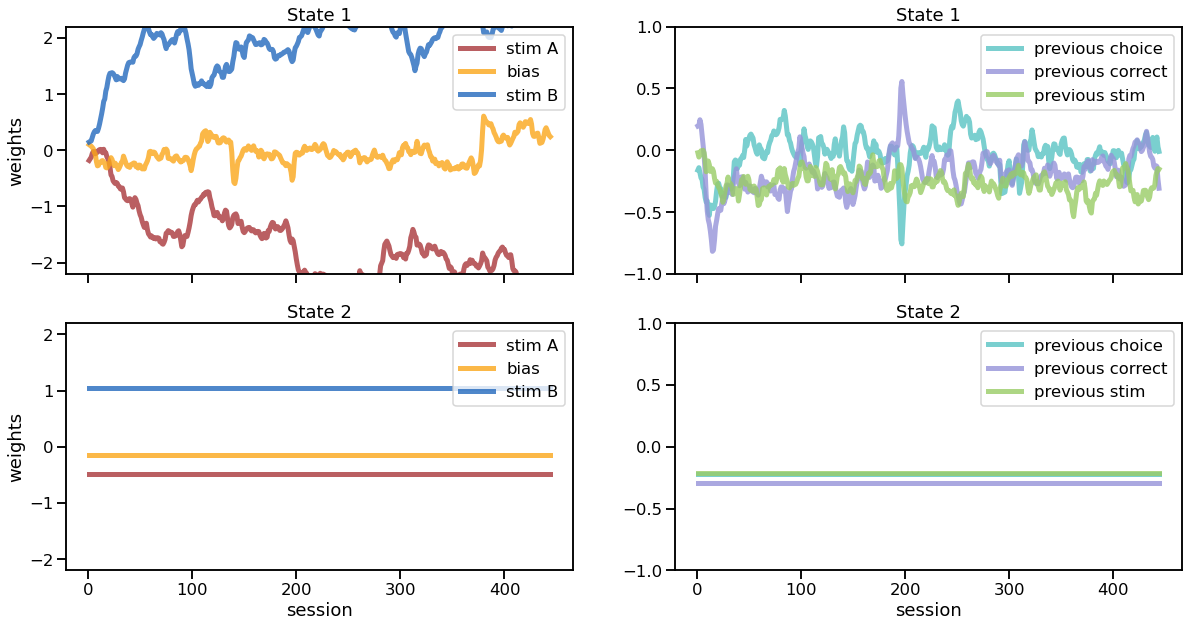

In [9]:
rat_id = 'W060'
stage_filter = 3
folds = 4
K = 2
L2penaltyW = 1
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# PLOTTING WEIGHTS ACROSS MULTIPLE SIGMAS
for i in range(1,5):
    for fold in range(0,1):
        trainSessInd = np.load(f'../data_PWM/trainSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}.npy')
        testSessInd = np.load(f'../data_PWM/testSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}.npy')
        fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(20,10))
        print(allP[i])
        axes[0,0].set_ylim(-2.2,2.2)
        axes[1,0].set_ylim(-2.2,2.2)
        axes[0,1].set_ylim(-1,1)
        axes[1,1].set_ylim(-1,1)
        # fig.suptitle(f'PWM {rat_id} - {K} state, sigma={np.round(sigmaList[indSigma],4)}')
        plotting_weights_PWM(w=mixedGlmhmmW, sessInd=trainSessInd, axes=axes, sessStop=None, title=f'PWM {rat_id} - {K} state, sigma=', save_fig=False)


In [14]:
### Maybe change sigma to close to 0.1 to have some fitting in first state too

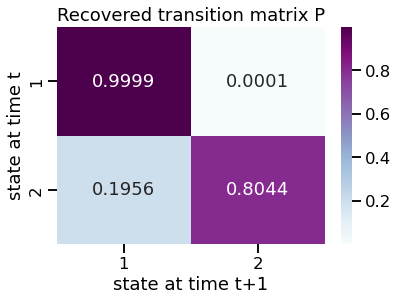

In [16]:
rat_id = 'W060'
stage_filter = 3
folds = 4
K = 2
L2penaltyW = 1
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,5,1,dtype=float))] 
# PLOTTING WEIGHTS ACROSS MULTIPLE SIGMAS
for i in [1]:
    for fold in range(0,1):
        trainSessInd = np.load(f'../data_PWM/trainSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}.npy')
        testSessInd = np.load(f'../data_PWM/testSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}.npy')
        # fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(20,10))
        # print(allP[i])
        # # axes[0,0].set_ylim(-2.5,2.5)
        # axes[1,0].set_ylim(-2.5,2.5)
        # axes[0,1].set_ylim(-1,1)
        # axes[1,1].set_ylim(-1,1)
        # # fig.suptitle(f'PWM {rat_id} - {K} state, sigma={np.round(sigmaList[indSigma],4)}')
        # plotting_weights_PWM(w=allW[i], sessInd=trainSessInd, axes=axes, sessStop=None, title=f'PWM {rat_id} - {K} state, sigma={np.round(sigmaList[indSigma],4)}', save_fig=False)

    s = sns.heatmap(np.round(allP[i],4),annot=True,cmap='BuPu', fmt='g')
    s.set(xlabel='state at time t+1', ylabel='state at time t', title='Recovered transition matrix P', xticklabels=[1,2], yticklabels=[1,2])
    fig = s.get_figure()

In [ ]:
## TRY FITTING THE OTHER WAY AROUND WITH SIGMA BIG STATE FIT FIRST

### 2D SIGMA OPTIONS

### Only fitting until session 200 for animals 'W060' and 'W075' with Dirichlet Prior on P and traint/test CV splits with blocks of 10

In [9]:
# setting hyperparameters
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,4,1,dtype=float))]
L2penaltyW=1
priorDirP=[100,10]
maxiter = 300
splitFolds = 4
fitFolds = 2

In [8]:
# fitting for K = 1
K = 1

for animal in ['W060','W075']:
    x, y = io_utils.prepare_design_matrices(rat_id=animal, path=laptop_path, psychometric=True, cutoff=40, stage_filter=3, overwrite=False)
    sessInd = list(io_utils.session_start(rat_id=animal, path=laptop_path, psychometric=True, cutoff=40, stage_filter=3))

    # NOT LOOKING AT FULL DATASET
    sessStop = 200
    x = x[0:sessInd[sessStop]]
    y = y[0:sessInd[sessStop]]
    sessInd = sessInd[0:sessStop+1]

    # fitting
    trainLl, testLl, allP, allW, trainSessInd, testSessInd = fit_eval_CV_multiple_sigmas(x, y, sessInd, K, splitFolds=splitFolds, fitFolds=fitFolds, sigmaList=sigmaList, maxiter=maxiter, glmhmmW=None, glmhmmP=None, L2penaltyW=L2penaltyW, priorDirP=priorDirP)
    
    # saving
    for fold in range(0, fitFolds):
        np.save(f'../data_PWM/trainLl_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', trainLl[fold])
        np.save(f'../data_PWM/testLl_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', testLl[fold])
        np.save(f'../data_PWM/P_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', allP[fold])
        np.save(f'../data_PWM/W_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', allW[fold])
        np.save(f'../data_PWM/trainSessInd_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', np.array(trainSessInd[fold]))
        np.save(f'../data_PWM/testSessInd_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', np.array(testSessInd[fold]))


Fold 0 training size 37435
Sigma Index 0
0
Sigma Index 1
0
Fold 1 training size 37945
Sigma Index 0
0
Sigma Index 1
0
Fold 0 training size 38728
Sigma Index 0
0
Sigma Index 1
0
Fold 1 training size 39119
Sigma Index 0
0
Sigma Index 1
0


In [24]:
for K in [2,3]:
    for animal in ['W060','W075']:
        x, y = io_utils.prepare_design_matrices(rat_id=animal, path=laptop_path, psychometric=True, cutoff=40, stage_filter=3, overwrite=False)
        sessInd = list(io_utils.session_start(rat_id=animal, path=laptop_path, psychometric=True, cutoff=40, stage_filter=3))

        # NOT LOOKING AT FULL DATASET
        sessStop = 200
        x = x[0:sessInd[sessStop]]
        y = y[0:sessInd[sessStop]]
        sessInd = sessInd[0:sessStop+1]

        glmhmmP = np.load(f'../data_PWM/P_PWM_bestGLMHMM-Iris_{animal}_sf=3_{K}_state_untilSession250.npy') 
        glmhmmW = np.load(f'../data_PWM/W_PWM_bestGLMHMM-Iris_{animal}_sf=3_{K}_state_untilSession250.npy')

        # fitting
        trainLl, testLl, allP, allW, trainSessInd, testSessInd = fit_eval_CV_multiple_sigmas(x, y, sessInd, K, splitFolds=splitFolds, fitFolds=fitFolds, sigmaList=sigmaList, maxiter=maxiter, glmhmmW=glmhmmW, glmhmmP=glmhmmP, L2penaltyW=L2penaltyW, priorDirP=priorDirP)

        # saving
        for fold in range(0, fitFolds):
            np.save(f'../data_PWM/trainLl_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', trainLl[fold])
            np.save(f'../data_PWM/testLl_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', testLl[fold])
            np.save(f'../data_PWM/P_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', allP[fold])
            np.save(f'../data_PWM/W_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', allW[fold])
            np.save(f'../data_PWM/trainSessInd_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', np.array(trainSessInd[fold]))
            np.save(f'../data_PWM/testSessInd_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}', np.array(testSessInd[fold]))



Animal  W060
63739
(63739, 2, 6, 2)
Animal  W075
61667
(61667, 2, 6, 2)
Animal  W081
28118
(28118, 2, 6, 2)
Animal  W060
63739
(63739, 2, 6, 2)
Animal  W075
61667
(61667, 2, 6, 2)
Animal  W081
28118
(28118, 2, 6, 2)


# Looking at model performance and recovered parameters

In [44]:
# Reading models for following hyperparameters
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,4,1,dtype=float))]
L2penaltyW=1
priorDirP=[1000,100]
maxiter = 300
splitFolds = 4
fitFolds = 2

# to tweak for different models:
sessStop = 200 # sessStop in [200,-1]
animal = 'W075' # in ['W060','W075']

testLl = []
allP = [] 
allW = [] 
trainSessInd = []
for K in range(1,4):
    for fold in range(0, fitFolds):
        testLl.append(np.load(f'../data_PWM/testLl_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}.npy'))
        allP.append(np.load(f'../data_PWM/P_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}.npy'))
        allW.append(np.load(f'../data_PWM/W_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}.npy'))
        trainSessInd.append(np.load(f'../data_PWM/trainSessInd_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}.npy'))

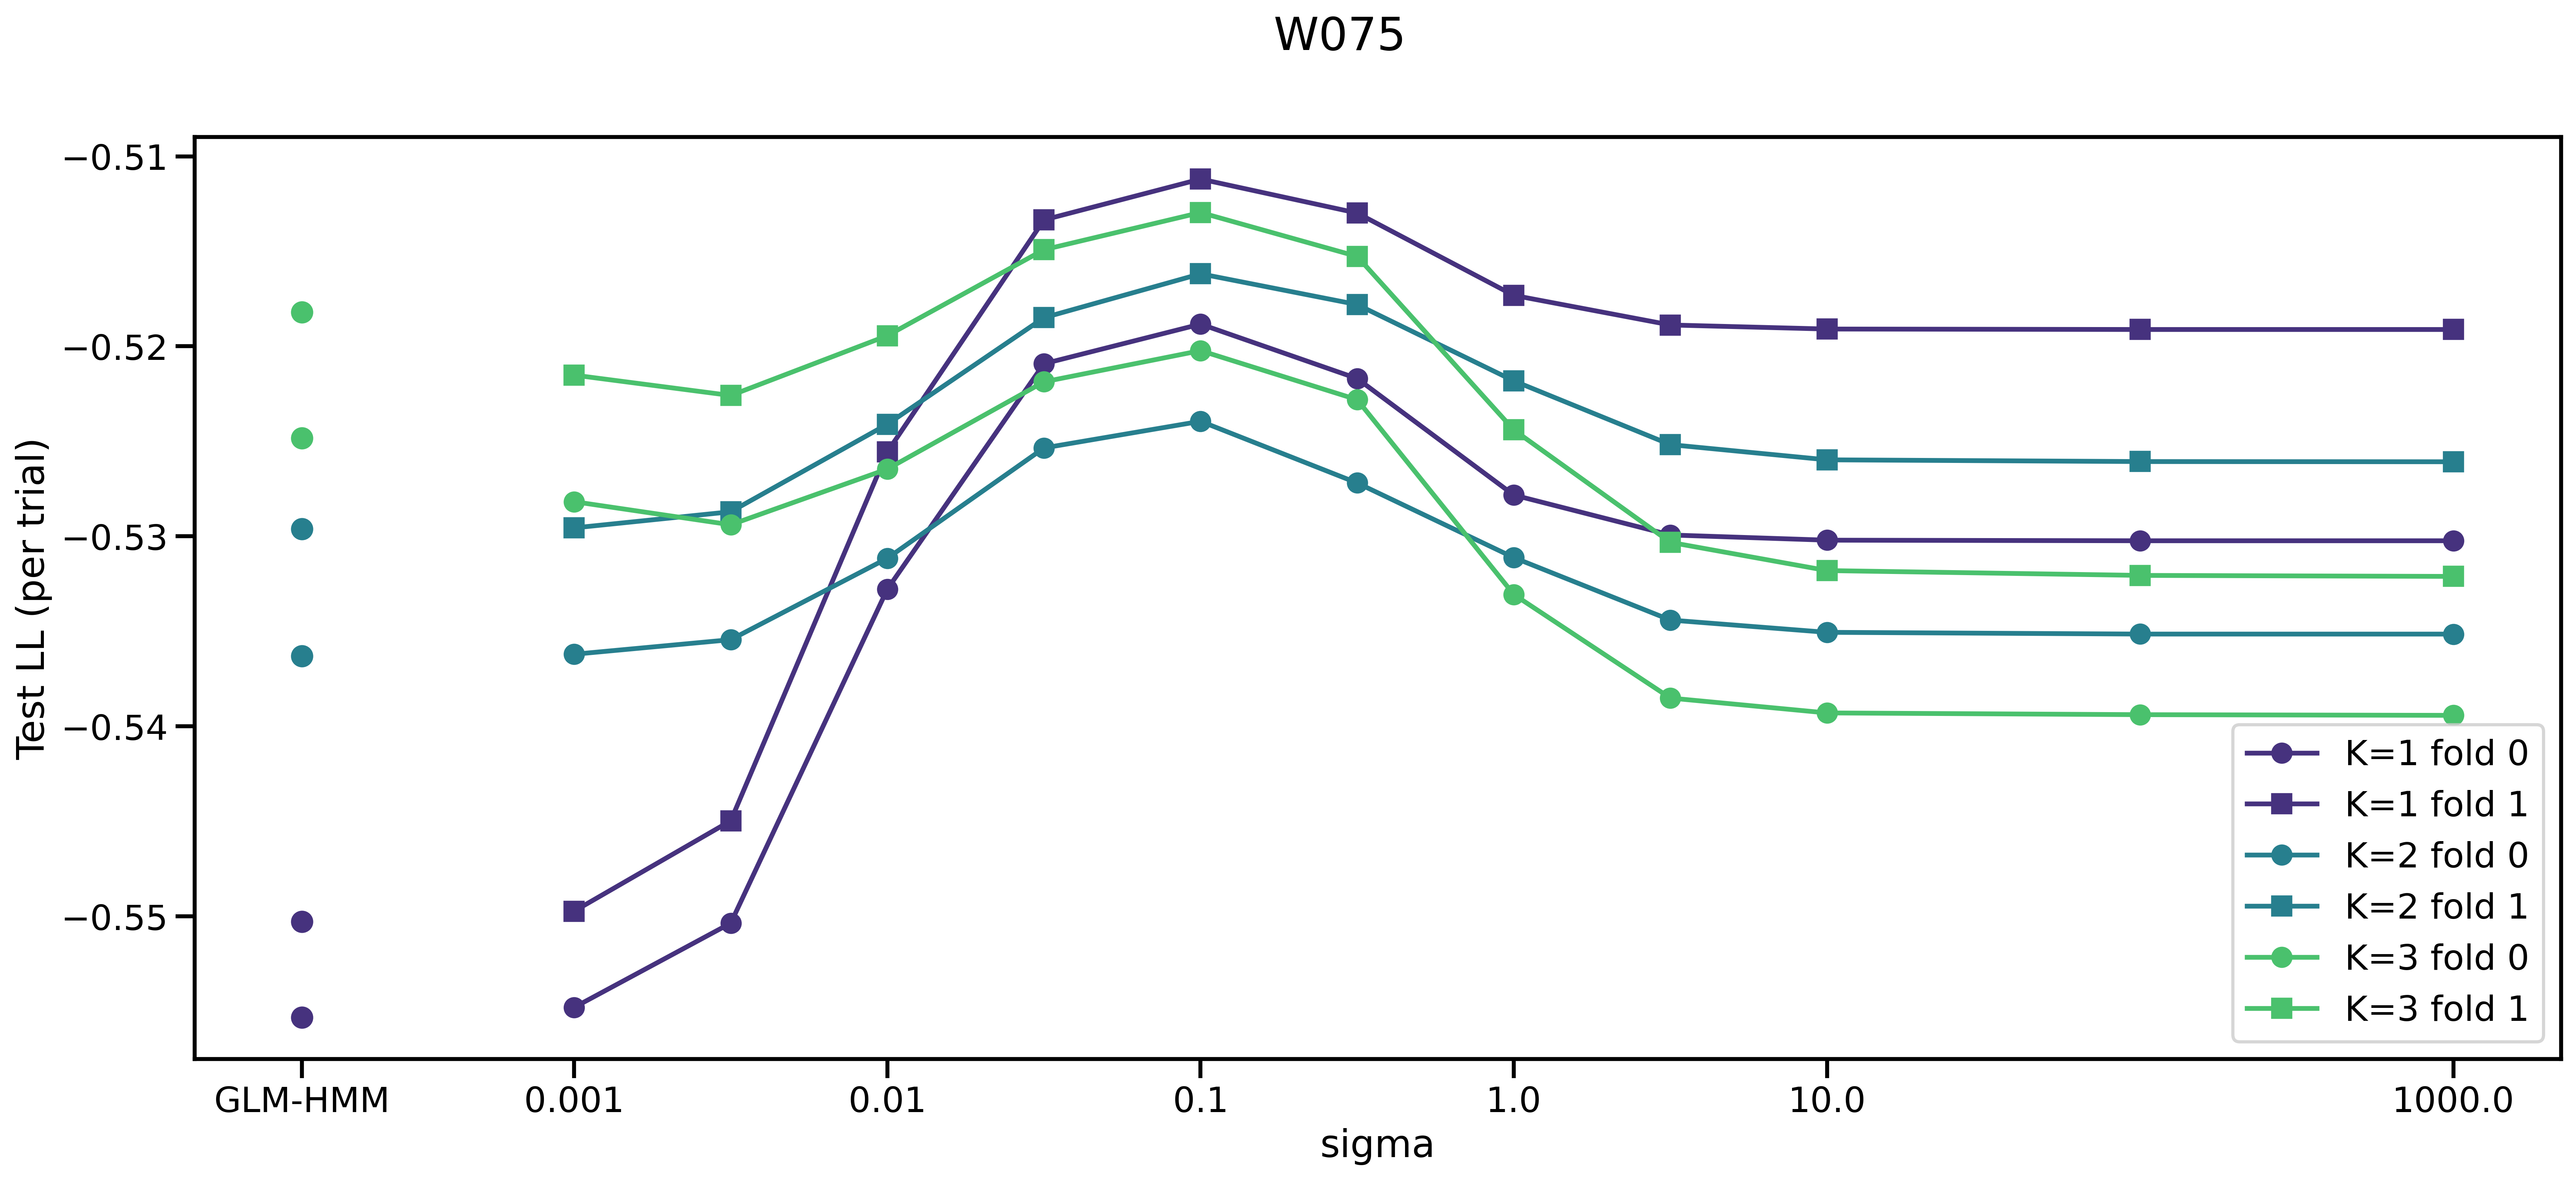

In [45]:
ls = ['-o','-s']
fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
fig.suptitle(f'{animal}')
for K in range(1,4):
    for fold in range(0, fitFolds):
        plot_testLl_CV_sigma(testLl[2*(K-1)+fold], sigmaList=sigmaList, label=f'K={K} fold {fold}', color=2*(K-1), axes=axes, linestyle=ls[fold])

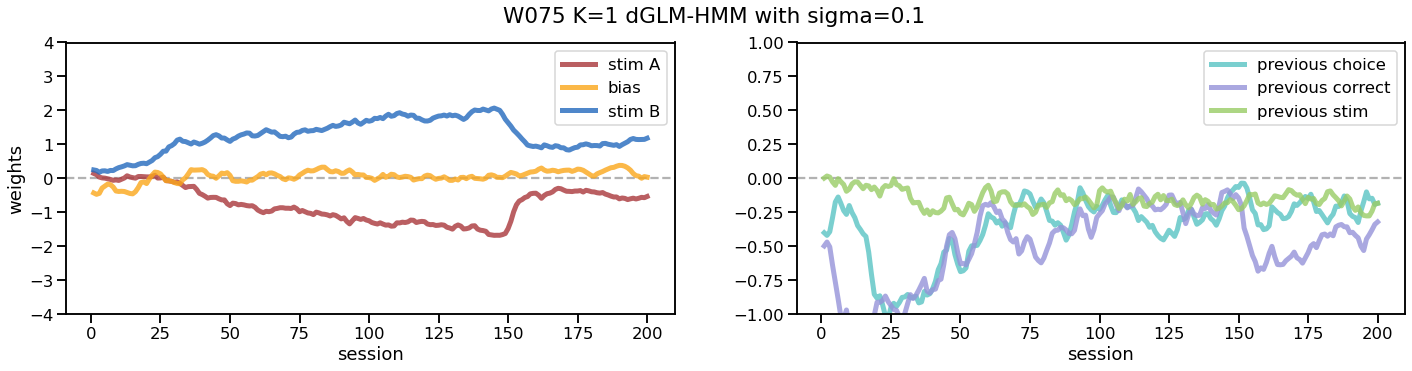

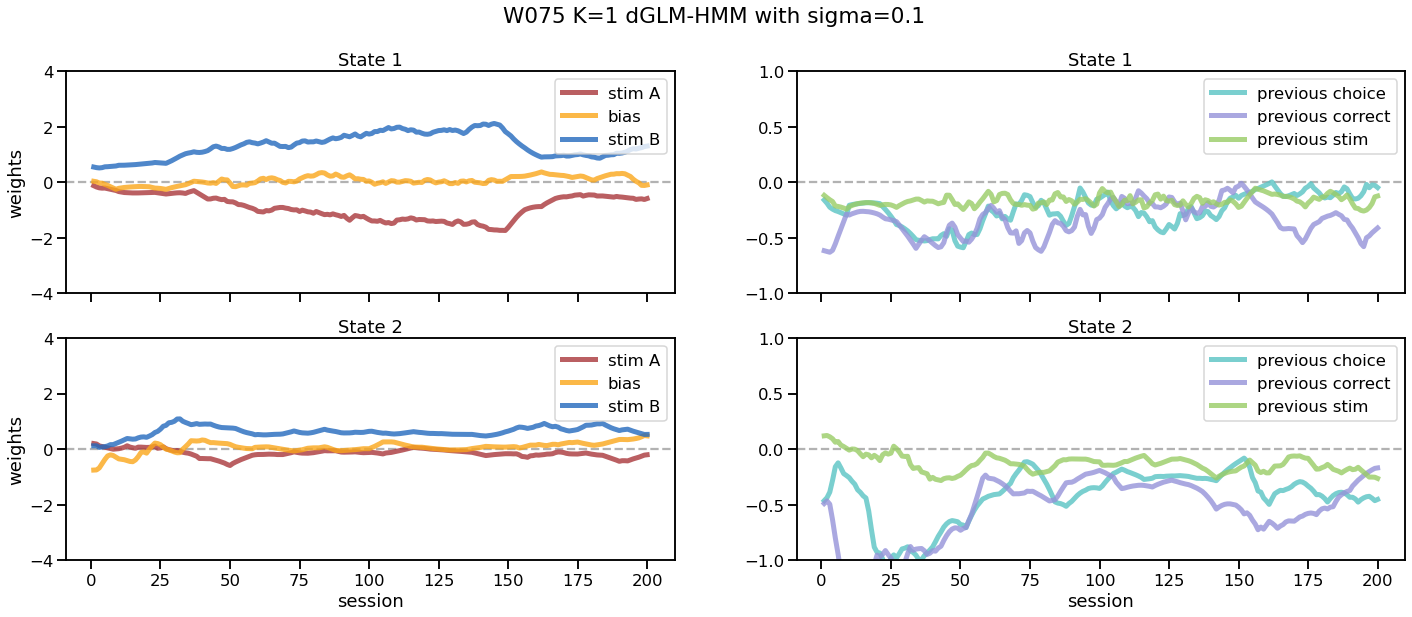

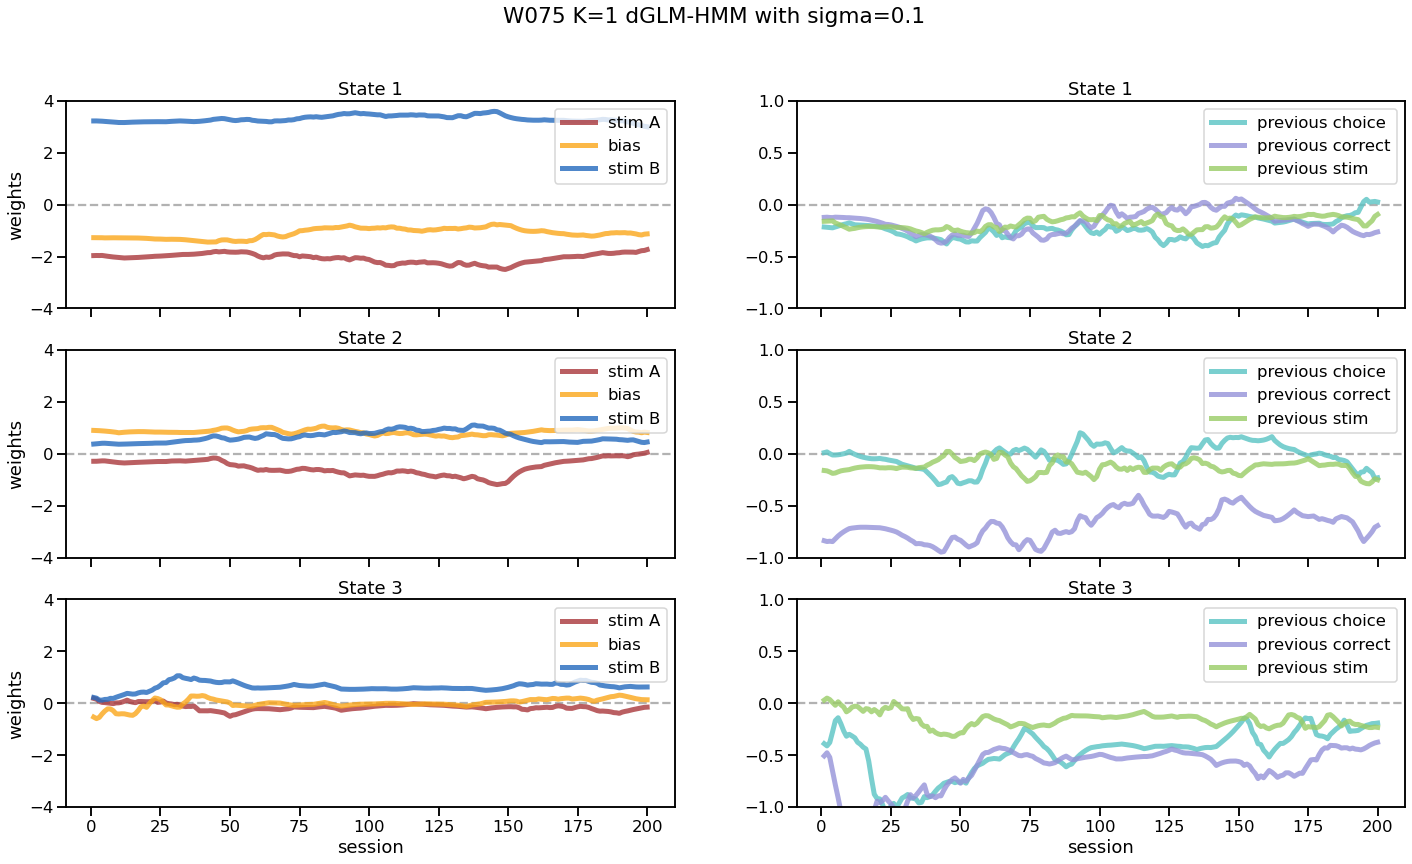

In [46]:
ind = 5
for K in range(1,4):
    for fold in [1]:#range(0, fitFolds):
        fig, axes = plt.subplots(nrows=K, ncols=2, sharex=True, sharey=False, figsize=(24,4*K+1))
        fig.suptitle(f'{animal} K=1 dGLM-HMM with sigma={np.round(sigmaList[ind],2)}')
        # fig.tight_layout()
        plotting_weights_PWM(allW[2*(K-1)+fold][ind], trainSessInd[2*(K-1)+fold], axes, sessStop=None, yLim=[-4,4,-1,1], title='', save_fig=False)
        # plotting_weights_IBL(allW[2*(K-1)+fold][ind], trainSessInd[2*(K-1)+fold], axes, yLim=[-5,5], colors=myColors, labels=myFeatures)

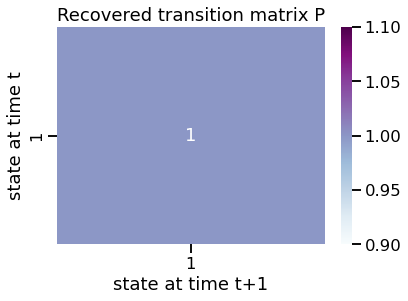

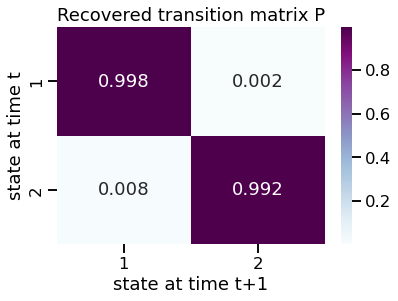

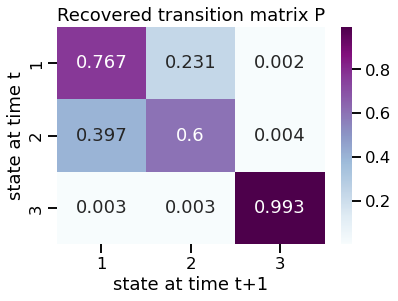

In [39]:
ind = 5
for K in range(1,4):
    for fold in [1]:#range(0, fitFolds):
        fig, axes = plt.subplots()
        sortedStateInd = get_states_order(allW[2*(K-1)+fold][ind], trainSessInd[0])
        plot_transition_matrix(allP[2*(K-1)+fold][ind], sortedStateInd)

In [28]:
x, y = io_utils.prepare_design_matrices(rat_id=animal, path=laptop_path, psychometric=True, cutoff=40, stage_filter=3, overwrite=False)
sessInd = list(io_utils.session_start(rat_id=animal, path=laptop_path, psychometric=True, cutoff=40, stage_filter=3))

# NOT LOOKING AT FULL DATASET
sessStop = 200
x = x[0:sessInd[sessStop]]
y = y[0:sessInd[sessStop]]
sessInd = sessInd[0:sessStop+1]

ind = 5
K = 3
fold = 0

trainX, trainY, trainSessInd, testX, testY, testSessInd = split_data(x, y, sessInd, folds=splitFolds, blocks=10, random_state=1)
N = trainX[fold].shape[0]
D = trainX[fold].shape[1]
C = 2



dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
gamma = dGLM_HMM.get_posterior_latent(allP[2*(K-1)+fold][ind], allW[2*(K-1)+fold][ind], trainX[fold], trainY[fold], trainSessInd[fold], pi0=None)

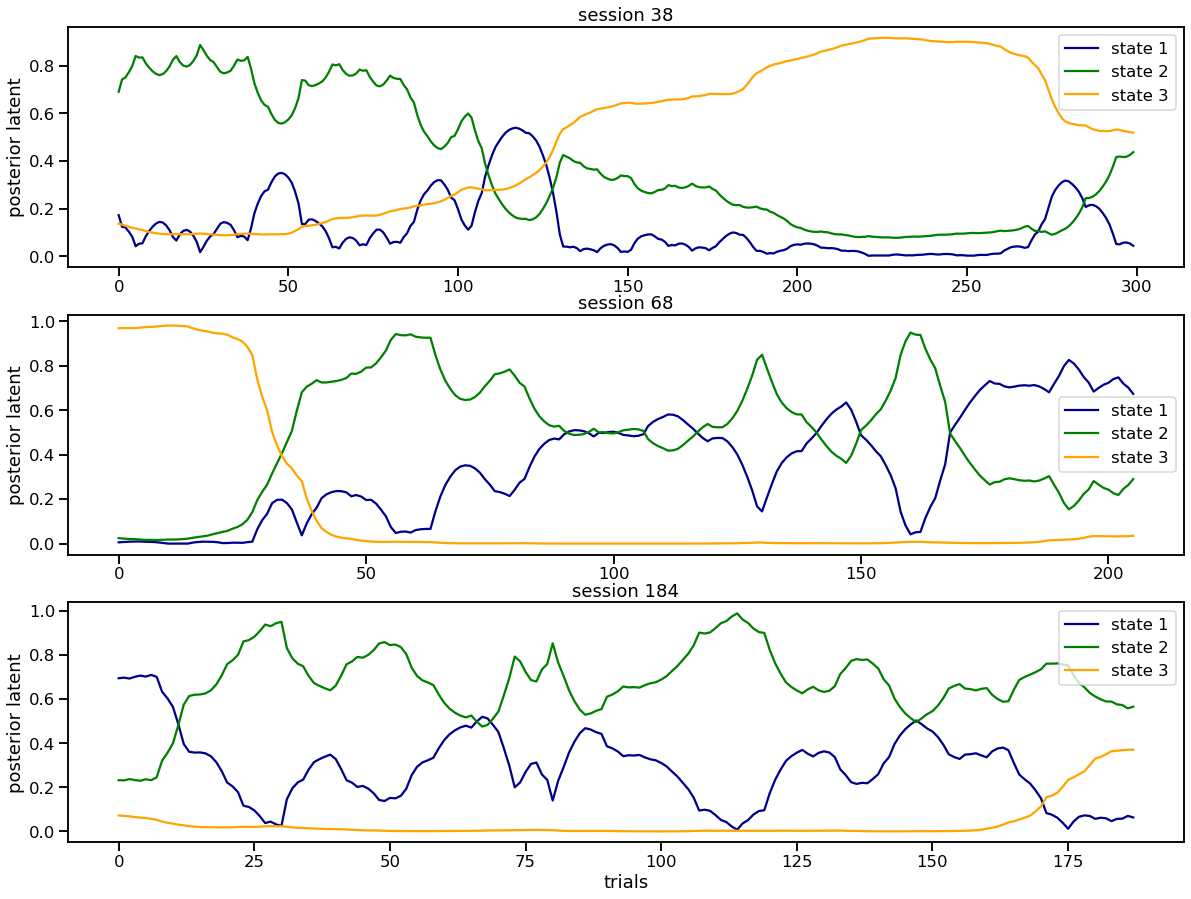

In [29]:
plot_posteior_latent(gamma, trainSessInd[0], sessions = [38,68,184])


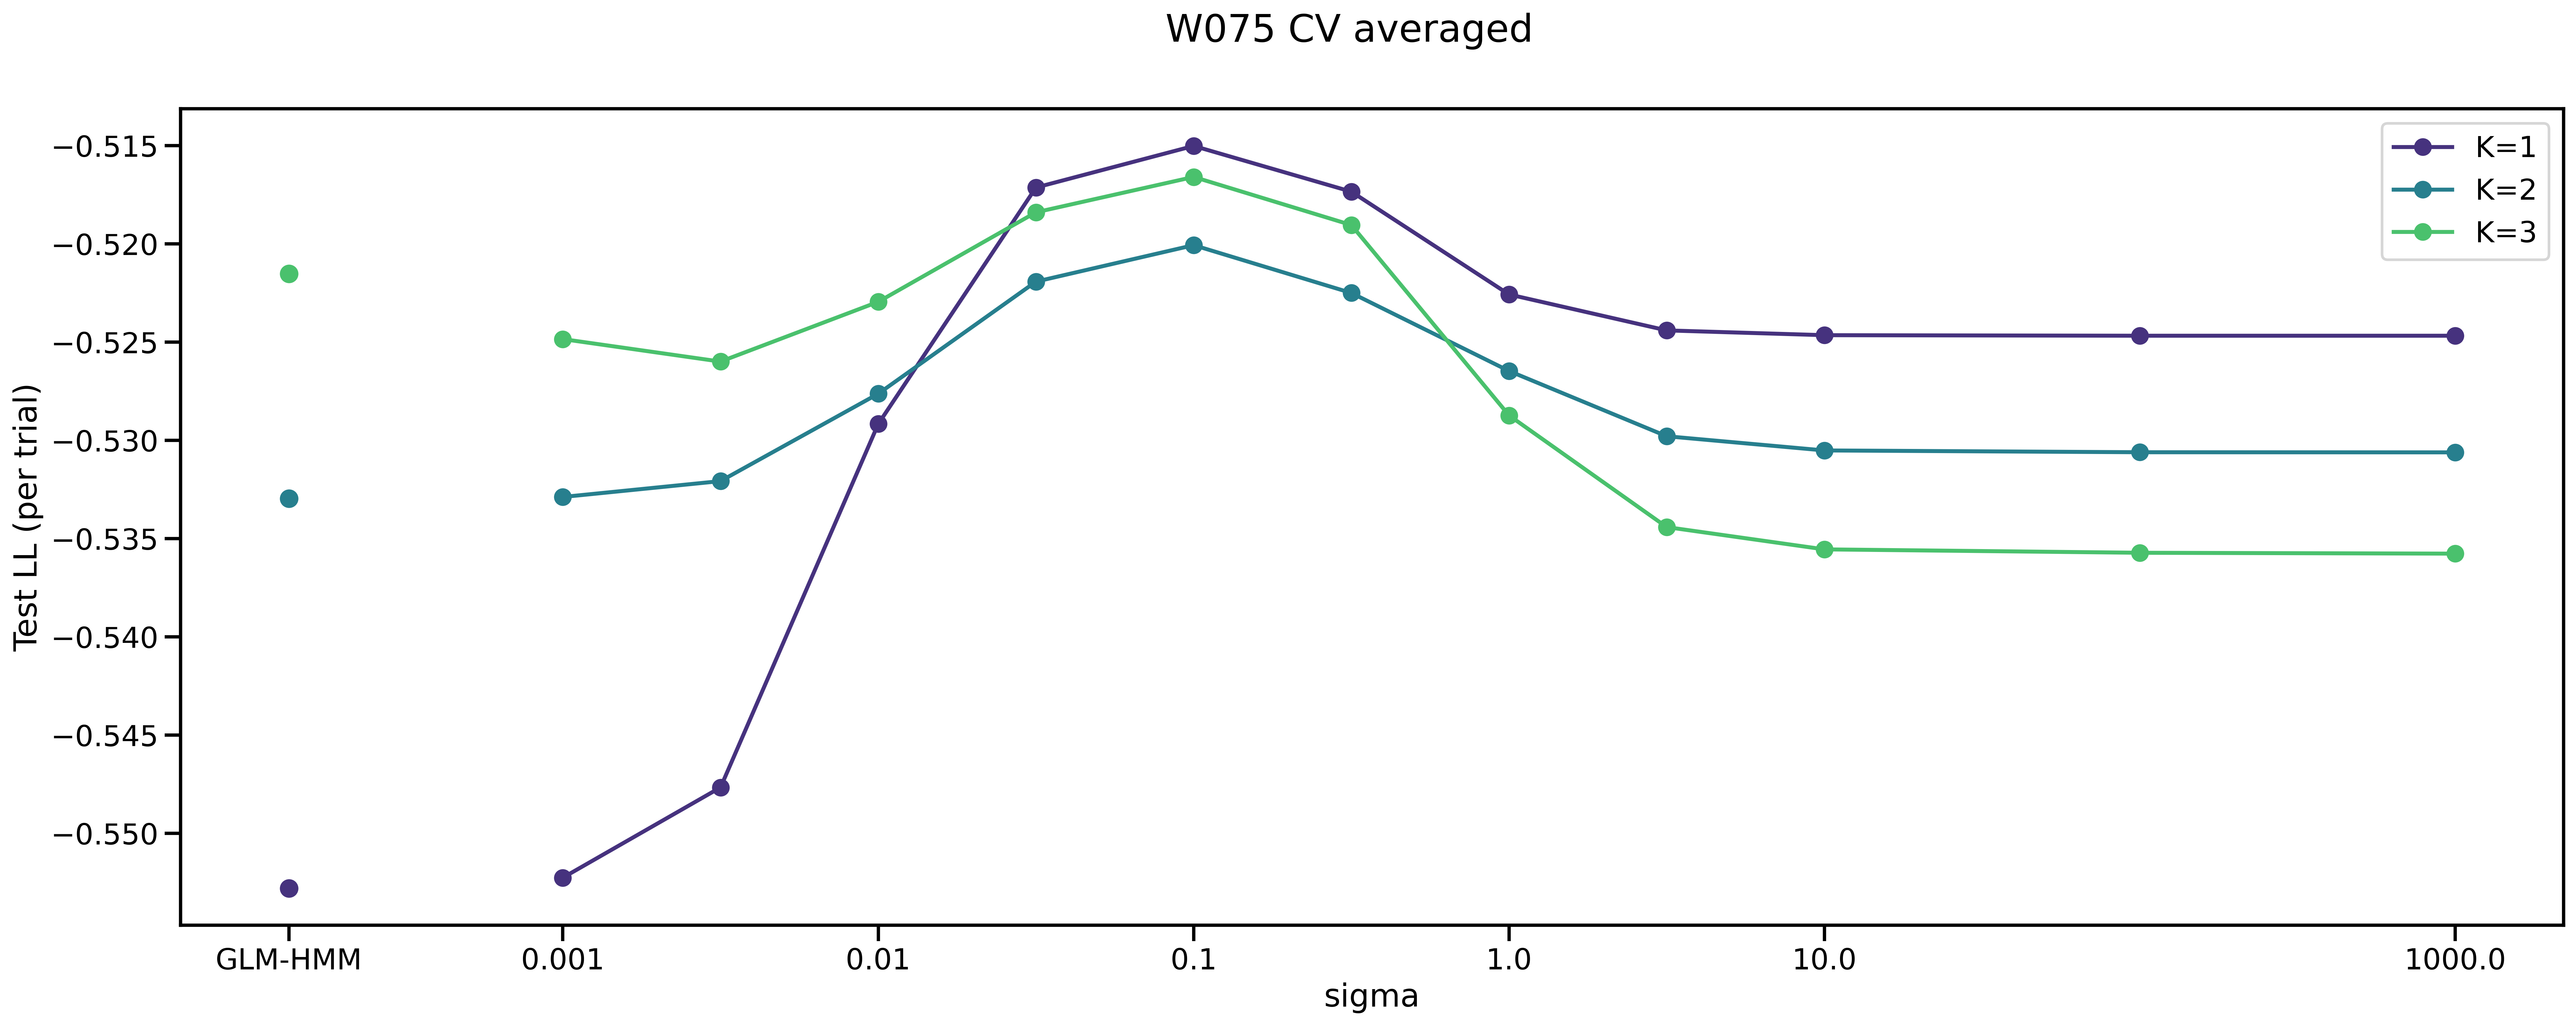

In [47]:
# Reading models for following hyperparameters
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,4,1,dtype=float))]
L2penaltyW=1
priorDirP=[1000,100]
maxiter = 300
splitFolds = 4
fitFolds = 2

# to tweak for different models:
sessStop = 200 # sessStop in [200,-1]
animal = 'W075' # in ['W060','W075']
avgTestLl = []
trainSessInd = []
for K in range(1,4):
    testLl = []
    for fold in range(0, fitFolds):
        testLl.append(np.load(f'../data_PWM/testLl_PWM_{animal}_{K}_state_fold-{fold}_multiple_sigmas_L2penaltyW={L2penaltyW}_priorDirP={priorDirP[0]}_untilSession{sessStop}.npy'))
    avgTestLl.append(np.mean(testLl[:],axis=0))

fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
fig.suptitle(f'{animal} CV averaged')
fig.tight_layout()
for K in range(1,4):
    plot_testLl_CV_sigma(avgTestLl[K-1], sigmaList=sigmaList, label=f'K={K}', color=2*(K-1), axes=axes)